<a id='toc'></a>
# Анализ оттока клиентов банка "Метанпром" и их сегментация по количеству потребляемых продуктов

**Материалы:**

Презентация: https://1drv.ms/p/c/6fce2725f38b83eb/ERP-ZJhp7QdLtXkAbiCet9gBWC1nRvkYjG19LE6wJ1tsrA?e=lpJZVf

**Цель исследования**

Необходимо сегментировать пользователей банка по количеству потребляемых продуктов, обращая особое внимание на отток, а также предположить какими продуктами пользуются клиенты. 
Анализ поможет составить портрет лояльных клиентов, и тех, которые склонны уходить из банка.

**Заказчик**

Отдел маркетинга "Метанпромбанка".

**Описание данных**

Мы будем работать с данными из следующего файла:
- /datasets/bank_scrooge.csv,
где:
  - USERID - идентификатор пользователя;
  - score — баллы кредитного скоринга. Данный признак формируется вне банковской системы, как мы не знаем;
  - city — город;
  - gender — пол;
  - age — возраст;
  - equity - количество баллов собственности. Данный признак также, как и score формируется вне банковской системы. Количество баллов не равно количеству предметов собственности, скорее зависит от ее ценности, чем дороже имущество (например, квартира, тем выше балл). Клиент сам предоставляет эти данные банку для того, чтобы получить возможность пользоваться некоторыми продуктами (возможно, ипотечным или другим кредитом). Могу предположить, что чем выше балл, тем лояльнее банк к клиенту, например, банк может предложить ему меньшую ставку по тому же кредиту; 
  - balance - баланс на счёте. Данный признак показывает общий баланс средств клиента от любых продуктов, исключая кредитную карту, за предыдущий день;
  - products -  количество продуктов, которыми пользуется клиент. В этот параметр также входит наличие кредитной карты или ее отсутствие;
  - credit_card — есть ли кредитная карта. 0 - нет кредитной карты, 1 - есть кредитная карта;
  - last_activity — активный клиент. Имеется в виду любая активность за предыдущий месяц. 0 - неактивный клиент, 1 - активный клиент;
  - EST_SALARY — оценочный доход клиента. Данный признак формируется вне банковской системы. Это не заработная плата, а скорее средняя сумма от всех поступлений за год;
  - сhurn — признак оттока. 0 - клиент не ушел, 1 - клиент ушел или вот-вот уйдет.

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. О качестве данных ничего не известно. Поэтому перед исследованием данных понадобится их обзор.

**Ход исследования**

- Загрузка и базовый анализ данных:
  - импорт библиотек;
  - чтение файла;
  - выгрузка общей информации о датасете;
  - изучение общей информации о каждом столбце c помощью гистограмм.
  
**Подготовка данных:**
  - изменение типов данных  в столбцах при необходимости;
  - корректировка названий столбцов при необходимости;
  - анализ пропусков в данных и способов их обработки;
  - проверка данных на явные и неявные дубликаты, и их удаление при необходимости;
  - изучение уникальных значений каждого столбца;
  - изучение аномальных значений и их удаление при необходимости;
  - кодирование данных категориальных столбцов с использованием pd.get_dummies для получения для каждого признака бинарного значения;
  - добавление новых признаков;
  - корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix.
  
**Исследовательский анализ данных:**
  - анализ распределения признаков в разрезе оттока. Визуализируем результат;
  - анализ портретов клиентов в разрезе оттока по количеству потребляемых продуктов;
  - корреляционный анализ данных с помощью phik_matrix для поиска зависимостей для последующей сегментации клиентов банка. Интерпретируем результат. 
  
**Проверка статистических гипотез:**
  - первая гипотеза:
    - проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним;
    - $$
\begin{cases}
H_0:\text{средние значения возраста у клиентов, использующих один и два продукта банка, одинаковы.}
\\
H_1:\text{средние значения возраста у этих двух групп клиентов отличаются.} 
\end{cases}
   - $$
    - проведем проверку этой гипотезы с помощью статистического теста. Выбор теста будет проведен после анализа данных;
    - самопроверка и интерпретация;  
  - другие гипотезы:
    - будут сформулированы в процессе исследования. 
    
**Подведение промежуточных итогов:**
  - выводы по результатам исследовательского анализа данных;
  - выводы по результатам корреляционного анализа;
  - выводы по проверке гипотез;
  - выделение признаков, влияющих на использование клиентами продуктов;
  - составление портретов пользователей. 
  
**Сегментация (3 сегмента от 300 до 1000 клиентов в каждом):**
  - сегментируем пользователей с учетом важности признаков, выявленных в исследовательском анализе данных и нашем предположении о возможном назначении продуктов исходя из портрета пользователей;
  - для сегментации по оттоку возьмем пользователей, у кого он выше или ниже, чем в среднем по банку;
  - приоритизируем сегменты по доле оттока, для того, чтобы отделу маркетинга понимать, с кем начинать работать в первую очередь.
  
**Формирование рекомендаций по работе с сегментами.**

Мы проведем необходимые вычисления, на основании которых проанализируем данные и, таким образом, исследование пройдёт в 9 этапов:

- [Загрузка и базовый анализ данных.](#1)
- [Подготовка данных.](#2)
- [Исследовательский анализ данных.](#3)
- [Проверка статистических гипотез.](#4)
- [Промежуточные итоги.](#5)
- [Сегментация клиентов банка.](#6)
- [Формирование рекомендаций по работе с сегментами.](#7)
- [Общий вывод.](#8)
- [Презентация.](#9)

<a id="1"></a>
### Загрузка и базовый анализа данных

In [1]:
#!pip install phik

In [2]:
# Импорт библиотек
import pandas as pd
import os
import numpy as np
import requests
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import seaborn as sns
from scipy import stats as st
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import itertools
import phik

# Устанавливаем длину вывода текста
pd.options.display.max_colwidth = 150

In [3]:
# Чтение файла 
url = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'
filename = 'bank_scrooge.csv'

# Проверяем, существует ли файл на локальной машине
if os.path.exists(filename):
    data = pd.read_csv(filename)
else:
    # Скачиваем файл по URL-адресу
    response = requests.get(url)
    
    # Проверяем успешность загрузки файла
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        data = pd.read_csv(filename)
    else:
        print('Failed to download file')

In [4]:
# Выводим основную информацию по датасету 
display(data.head(10))
print()
data.info()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


В датасете 12 столбцов, 10000 строк.

Согласно документации к данным:
- USERID - идентификатор пользователя;
- score — баллы кредитного скоринга;
- city — город;
- gender — пол;
- age — возраст;
- equity - количество баллов собственности; 
- balance - баланс на счёте;
- products -  количество продуктов, которыми пользуется клиент;
- credit_card — есть ли кредитная карта;
- last_activity — активный клиент;
- EST_SALARY — оценочный доход клиента;
- сhurn — признак оттока.

При необходимости в дальнейшем поменяем тип данных в столбце age на integer, а также приведем названия столбцов к нижнему регистру и к "snake_case".

In [5]:
# Посмотрим на самые часто встречающиеся значения некоторых столбцов
print('Самая часто встречающийся город:', data['city'].mode())
print()
print('Самое часто встречающийся пол:', data['gender'].mode())
print()
print('Самый часто встречающийся возраст:', data['age'].mode())
print()
print('Самое частое количество баллов собственности:', data['equity'].mode())
print()
print('Самое часто встречающееся количество продуктов:', data['products'].mode())

Самая часто встречающийся город: 0    Ярославль
Name: city, dtype: object

Самое часто встречающийся пол: 0    М
Name: gender, dtype: object

Самый часто встречающийся возраст: 0    36.0
Name: age, dtype: float64

Самое частое количество баллов собственности: 0    0
Name: equity, dtype: int64

Самое часто встречающееся количество продуктов: 0    2
Name: products, dtype: int64


In [6]:
# Выводим статистическое описание данных
display(data.describe())

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00000,10000.000000,9974.000000,10000.000000,7.705000e+03,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,171814.71260,848.699400,42.734409,2.627600,8.277943e+05,1.870100,0.680400,0.523500,1.478669e+05,0.182000
std,33708.23812,65.448519,12.179971,1.980836,1.980614e+06,0.792647,0.466345,0.499472,1.393885e+05,0.385864
min,94561.00000,642.000000,18.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142810.25000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525190e+04,0.000000
50%,172728.00000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196581e+05,0.000000
75%,201261.75000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745005e+05,0.000000
max,229145.00000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


По этим данным можно сделать следующие выводы:
- Минимальный бал кредитного скоринга - 642, максимальный - 1000. Стандартное отклонение отличается от среднего больше, чем на порядок;
- Минимальный возраст клиентов банка - 18 лет, максимальный - 86 лет, средний - 40 лет. Стандарное отклонение ниже среднего почти в 4 раза;
- Количество баллов собственности от 0 до 9, в среднем - 3;
- Баланс на счете от 0 до 119113552.01 руб. Стандартное отклонение больше, чем в 2 раза больше среднего;
- Количество продуктов, которыми пользуется клиент, варьируется от 0 до 5, в среднем - 2;
- Кредитная карта либо есть, либо нет. Примерно у 68% клиентов она есть;
- Активных клиентов всего на 2 с небольшим % больше неактивных;
- Оценочный доход клиента варьируется от 2546.3 до  1395064.45 руб;
- В отток ушли порядка 18% клиентов.
​
Необходимо изучить аномальные значения и выбросы, они явно присутствуют в данных, судя по разнице между средним и стандартным отклонением.

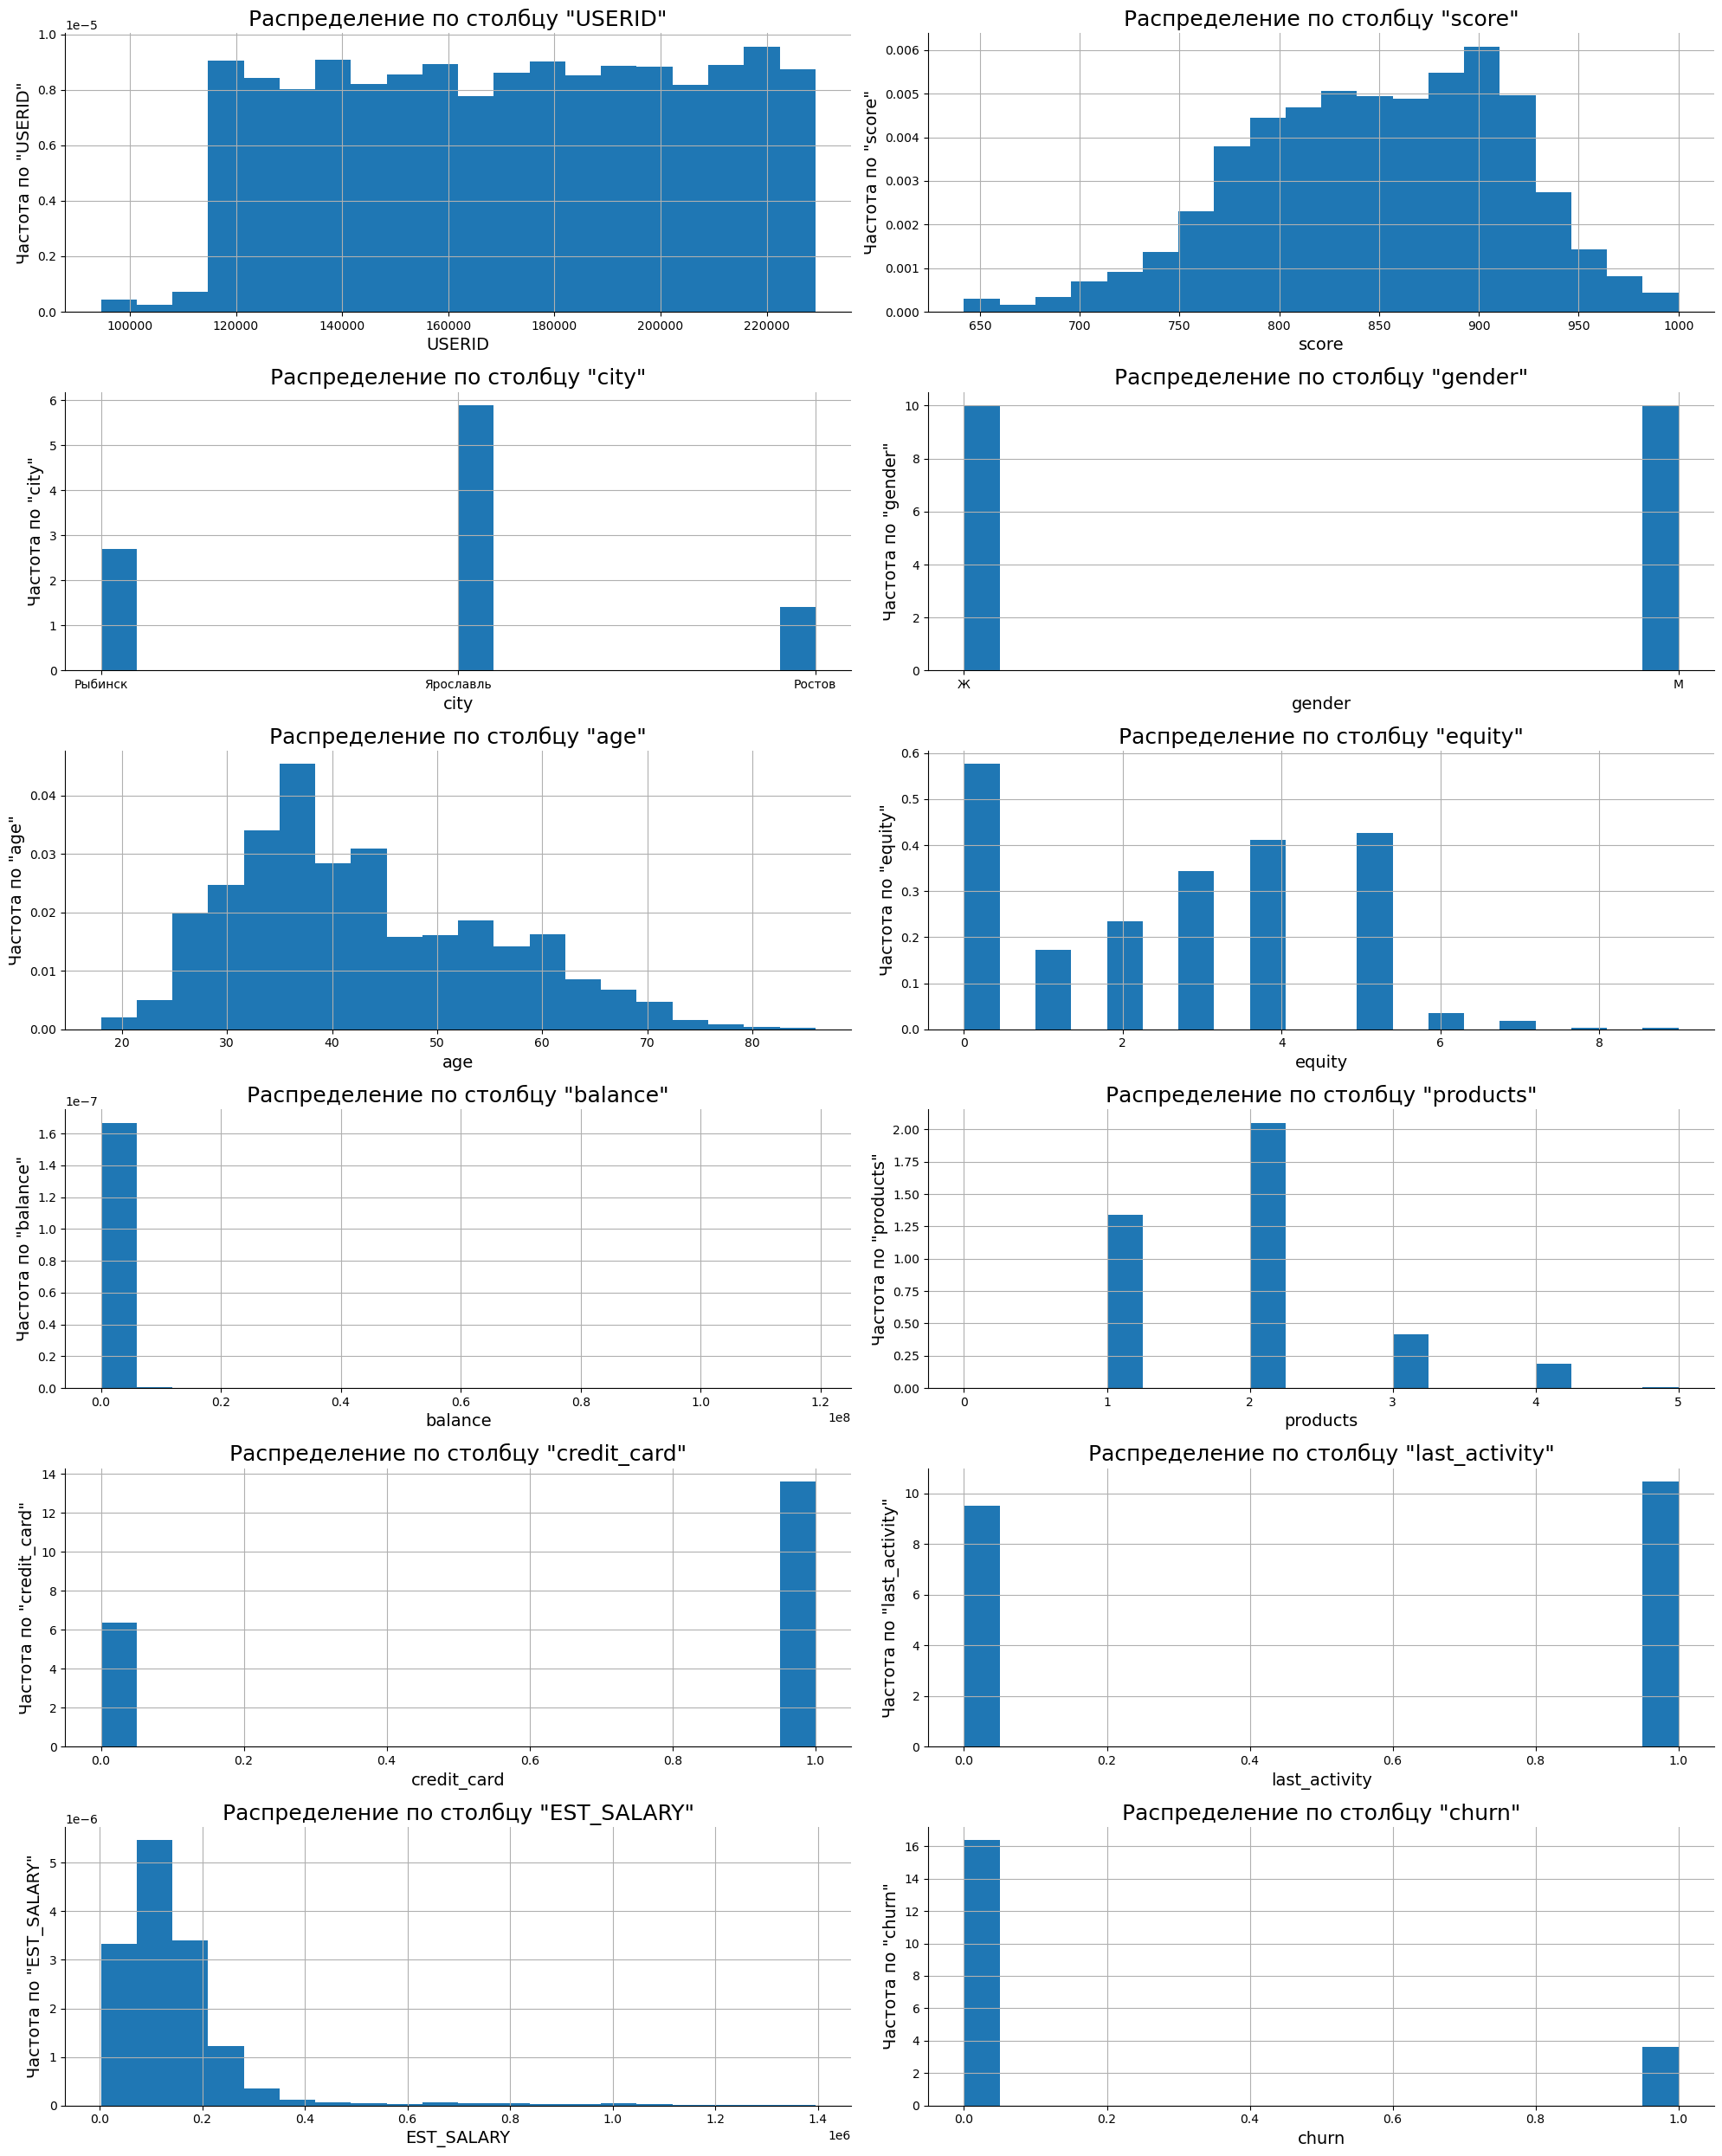

In [7]:
# Построим гистограммы для количественных столбцов нашего датасета
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 25))

selected_columns = data.columns
# Визуализируем данные по выбранным столбцам
for i, column in enumerate(selected_columns):
        row = i // 2 # вычисление номера строки для текущего графика в сетке
        col = i % 2 # вычисление номера столбца для текущего графика в сетке
        data[column].hist(bins=20, ax=axes[row, col], density=True)
        axes[row, col].set_title(f'Распределение по столбцу "{column}"', fontsize=18)
        axes[row, col].set_xlabel(column, fontsize=14)
        axes[row, col].set_ylabel(f'Частота по "{column}"', fontsize=14)

# Скроем пустую рамку в конце вывода
for i in range(len(selected_columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

sns.despine()
plt.tight_layout()

plt.show()

Судя по гистограммам, мы можем сказать следующее:
- на гистограмме столбца score мы видим близкое к нормальному распределение со смещением влево. Основная масса клиентов имеет от 820 до 930 баллов кредитного скоринга;
- больше всего клиентов из Ярославля, затем идет Рыбинск и на последнем месте Ростов;
- данные по полу распределились примерно одинаково;
- распределение столбца age - нормальное со смещением вправо. Больше всего клиентов в возрасте от 28 до 44 лет;
- большинство клиентов имеет либо 0 баллов собственности либо 4-5;
- средний баланс близок к 500 тыс. руб.;
- большая часть клиентов использует 1-2 продукта банка, в частности имеет кредитную карту;
- активных клиентов немногим больше неактивных;
- оценочный доход клиентов на пике составляет 90-110 тыс. руб. Распределение по столбцу близкое к нормальному со смещением вправо. Тут явно много аномальных значений;
- В отток ушло примерно в 5 раз меньше клиентов, чем осталось.

**Выводы:**

На данном этапе мы:
- Прочитали файл с данными;
- Вывели и изучили общую информацию о нем.

Впереди предобработка данных.

[Возврат к описанию проекта](#toc)

<a id="2"></a>
### Предобработка данных

#### Объявление функций для предобработки данных

In [8]:
# Определим функцию для проверки данных на наличие явных дубликатов
def find_explicit_duplicates(dataset):
    '''
    Функция предназначена для поиска явных дубликатов в наборе данных и их отображения:
    - используется метод duplicated(), который возвращает булеву серию, указывающую на дублирующиеся строки 
    в DataFrame. Метод sum() применяется к этой серии, чтобы подсчитать общее количество дублирующихся строк. 
    Результат сохраняется в переменную explicit_duplicates_cnt;
    - функция display() используется для вывода количества явных дубликато;
    - в условии проверяется, есть ли явные дубликаты в наборе данных. Если количество явных дубликатов больше 0, 
    т.е. они есть, то выполняется следующий блок кода. Если нет, то выводится сообщение о том, что явных 
    дубликатов не найдено;
    - если дубликаты найдены, то происходит фильтрация DataFrame, которая выводит только дубликаты в результате, 
    Метод duplicated(keep=False) помогает нам выбрать все строки, которые являются дубликатами. 
    Результат сохраняется в переменную explicit_duplicates.
    Таким образом, функция возвращает количество явных дубликатов и DataFrame с явными дубликатами (если они есть).
    '''
    # Находим явные дубликаты
    
    explicit_duplicates_cnt = display(f'Количество явных дубликатов: {dataset.duplicated().sum()}')
    
    explicit_duplicates = None
    explicit_duplicates_cnt = 0
    
    # Выводим дубликаты в виде таблицы, если они есть
    if dataset.duplicated().sum() > 0:
        explicit_duplicates = display(dataset[dataset.duplicated(keep=False)])
    else:
        display('Явные дубликаты не найдены')
    
    return explicit_duplicates_cnt, explicit_duplicates

In [9]:
# Определим функцию для проверки данных на наличие неявных дубликатов
def find_implicit_duplicates(dataset, columns_to_compare):
    '''
    Функция предназначена для поиска неявных дубликатов в наборе данных на основе выбранных столбцов для сравнения:
    - используется метод duplicated(), который возвращает булеву серию, указывающую на дублирующиеся строки в 
    DataFrame. Параметр subset определяет столбцы, по которым мы хотим искать дубликаты. 
    Параметр keep=False означает, что все дубликаты будут помечены как True, а не только первый. 
    Результат сохраняется в переменную implicit_duplicates;
    - в условии проверяется, есть ли неявные дубликаты в наборе данных. Если DataFrame implicit_duplicates 
    пустой (т. е. не содержит дубликатов), то выводится сообщение о том, что неявных дубликатов нет.
    Таким образом, функция возвращает DataFrame implicit_duplicates, содержащий все неявные дубликаты 
    (если они есть). Если неявных дубликатов нет, то возвращается сообщение о их отсутствии.
    '''
    # Находим неявные дубликаты
    implicit_duplicates = dataset[dataset.duplicated(subset=columns_to_compare, keep=False)]
    if implicit_duplicates.empty:
        display('Неявных дубликатов нет.')
    return implicit_duplicates

In [10]:
# Определим функцию, которая будет выводить описание данных в столбце, количество уникальных значений и 
# топ-5 лист самых популярных значений
def unique_describe(dataset):
    '''
    Функция предназначена для вывода описательной статистики и информации о количестве уникальных значений для 
    каждого столбца в наборе данных:
    - метод describe() вычисляет статистические характеристики (среднее, стандартное отклонение, минимум,
    максимум и квартили) для каждого числового столбца в DataFrame. Результаты выводятся с помощью
    функции display();
    - далее вычисляется количество уникальных значений в каждом столбце DataFrame. Результат выводится 
    с помощью функции display();
    - метод value_counts() вычисляет частоту встречаемости каждого уникального значения в столбцах DataFrame
    и выводит самые часто встречающиеся значения. Метод head() используется для вывода только первых 5
    строк результата. Результаты выводятся с помощью функции display().
    Таким образом, функция возвращает все три вышеупомянутых выражения в одном вызове функции display().
    '''
    return  display(dataset.describe(), 
                    f'Количество уникальных значений: {len(dataset.unique())}',
                    dataset.value_counts().head())   

In [11]:
# Определим функцию для подсчета средних значений
def count_means(continuous_cols, discrete_cols, binary_cols, object_cols, data, column):
    '''
    Функция предназначена для агрегаций значений выбранных солбцов с помощью различных функций:
    - группировка данных по столбцу column;
    - агрегация значений столбцов с помощью различных функций:
      - для непрерывных признаков берется медиана;
      - для дискретных признаков берется среднее значение;
      - для бинарных признаков также берется среднее значение;
      - для категориальных признаков берется мода (наиболее часто встречающееся значение).
    - округление всех значений до двух знаков после запятой;
    - сброс индексов группы и переиндексация для удобства;
    - транспонирование полученной таблицы для удобства чтения и отображения;
    - возвращение результата в виде таблицы.
    '''       
    table_name = (data
                 .groupby(column)
                 .agg({**{col: 'median' for col in continuous_cols},
                       **{col: 'mean' for col in discrete_cols},
                       **{col: 'mean' for col in binary_cols},
                       **{col: lambda x: x.mode().iloc[0] for col in object_cols}})
                 .round(2)
                 .reset_index()
                 .T)
    return table_name

#### Преобразуем названия столбцов

In [12]:
# Преобразуем название столбцов к нижнему регистру и к "snake_case"
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid': 'user_id'})

#### Проверим пропуски в датасете

In [13]:
# Создадим копию датасета до преобразований
temp = data.copy() 
len(temp)

10000

In [14]:
# Выведем количество пропущенных значений для датасета и отсортируем по возрастанию.
data.isna().sum().sort_values()

user_id             0
score               0
city                0
gender              0
equity              0
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
age                26
balance          2295
dtype: int64

In [15]:
# Вычислим долю пропусков данных в столбцах 
missing_values_percentage = pd.DataFrame(round(data.isna().mean()*100,3).sort_values())
missing_values_percentage.style.background_gradient()

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
equity,0.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000
est_salary,0.000000
churn,0.000000


In [16]:
# Посмотрим на пропуски в стобце age
mask = data['age'].isna()
rows_with_missing_values = data[mask]
display(rows_with_missing_values.sort_values(by='user_id'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8785,127440,663.0,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9457,141945,929.0,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
9667,163657,849.0,Ярославль,М,NaN,4,1254013.85,2,1,1,119106.67,0
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0
9632,185829,927.0,Ярославль,М,NaN,0,NaN,1,1,0,231254.86,0
9380,187459,894.0,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0


В столбце age 26 пропусков, почти все клиенты попадают в категорию неотточных, удалять не хотелось бы эти данные. Проверим, нет ли случайно в датасете дубликатов с теми же номерами user_id, и попробуем сравнить данные в них, если они есть, на предмет возможного заполнения пропусков.

In [17]:
# Получаем список уникальных user_id с пропущенными значениями в столбце 'age'
user_ids_with_missing_age = data.loc[data['age'].isna(), 'user_id'].unique()
#user_ids_with_missing_age = rows_with_missing_values['user_id'].unique()

for user_id in user_ids_with_missing_age:
    # Получаем все строки с данным user_id
    rows_with_same_user_id = data[data['user_id'] == user_id]
    display(rows_with_same_user_id)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
918,187635,918.0,Ярославль,Ж,44.0,0,NaN,1,1,1,162497.52,0
2165,187635,692.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1389,221156,687.0,Рыбинск,М,61.0,0,NaN,1,1,1,136361.72,0
2444,221156,913.0,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3091,138660,836.0,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4912,210674,834.0,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
5470,218868,827.0,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3683,151662,960.0,Ярославль,Ж,37.0,4,2527032.7,4,1,0,231648.50,0
5495,151662,884.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3230,210135,974.0,Ярославль,Ж,50.0,5,5680148.93,4,1,1,338471.66,0
7236,210135,908.0,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1010,219343,921.0,Ярославль,Ж,33.0,0,NaN,1,1,0,159475.61,0
7248,219343,920.0,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7345,184913,829.0,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.9,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
431,214031,856.0,Рыбинск,М,36.0,2,386426.67,4,1,1,72767.85,0
7409,214031,777.0,Ярославль,М,NaN,2,171510.23,1,1,1,75409.63,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1181,198635,896.0,Рыбинск,Ж,32.0,0,NaN,1,1,1,170866.01,0
8015,198635,670.0,Ярославль,Ж,NaN,0,NaN,1,1,1,168699.33,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6412,226550,939.0,Ярославль,М,34.0,0,NaN,1,1,1,145913.73,0
8070,226550,940.0,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4401,216848,929.0,Рыбинск,М,68.0,0,NaN,1,1,1,195902.59,0
8293,216848,930.0,Ярославль,М,NaN,0,NaN,1,1,1,199542.51,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
5889,206759,917.0,Ярославль,М,22.0,0,NaN,1,1,0,70617.52,0
8385,206759,915.0,Рыбинск,М,NaN,0,NaN,1,1,0,71179.53,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6685,210898,934.0,Рыбинск,Ж,35.0,0,NaN,1,0,1,912105.84,0
8449,210898,805.0,Ярославль,Ж,NaN,0,NaN,1,0,1,922080.25,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
440,221197,663.0,Рыбинск,М,27.0,0,NaN,1,1,1,172573.13,0
8632,221197,893.0,Ярославль,М,NaN,0,NaN,1,1,0,173929.92,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4443,127440,846.0,Рыбинск,М,66.0,1,57405.67,2,0,1,17831.63,0
8785,127440,663.0,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6446,222480,776.0,Ярославль,Ж,38.0,5,823145.83,2,1,1,55777.44,0
9104,222480,776.0,Рыбинск,Ж,NaN,5,796735.09,1,1,1,55073.63,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8897,202983,941.0,Ярославль,Ж,39.0,0,NaN,1,0,1,159348.84,0
9301,202983,942.0,Рыбинск,Ж,NaN,0,NaN,1,1,1,163804.73,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4720,187459,895.0,Ярославль,М,48.0,0,NaN,1,1,0,180887.50,0
9380,187459,894.0,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4343,141945,929.0,Рыбинск,М,33.0,0,NaN,1,1,0,381868.89,0
9457,141945,929.0,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3668,185829,925.0,Рыбинск,М,40.0,0,NaN,1,1,0,228305.64,0
9632,185829,927.0,Ярославль,М,NaN,0,NaN,1,1,0,231254.86,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9322,221809,917.0,Рыбинск,М,45.0,0,NaN,1,1,1,199728.29,0
9634,221809,917.0,Ярославль,М,NaN,0,NaN,1,1,1,192644.15,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6670,163657,903.0,Рыбинск,М,45.0,4,1343339.70,4,0,1,83741.65,0
9667,163657,849.0,Ярославль,М,NaN,4,1254013.85,2,1,1,119106.67,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4212,140934,919.0,Ярославль,Ж,29.0,4,603946.18,3,0,1,158438.79,0
9819,140934,832.0,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0


Есть одно полное совпадение за исключением города, для клиентов с id 141945 я позволю себе дозаполнить возраст. Есть также очень похожие клиенты, но с незначительными отличиями, их трогать я не буду, так как нет 100% уверенности, что это один и тот же человек. Решение о заполнении чем-либо пропусков или их удалении приму после анализа природы этих пропусков далее.

In [18]:
# Заменяем пропущенное значение возраста для клиента с индексом 9457 на 33
data.loc[9457, 'age'] = 33

In [19]:
# Посмотрим на пропуски в стобце balance
mask = data['balance'].isna()
rows_with_missing_values = data[mask]
display(rows_with_missing_values)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


В столбце balance почти 23% пропусков, удалить столько данных мы не можем, решим, что с ними делать также после  анализа природы пропусков.

#### Изучим дубликаты  в датасете

In [20]:
# Проверим явные дубликаты в датасете 
dataset = data
find_explicit_duplicates(dataset)

'Количество явных дубликатов: 0'

'Явные дубликаты не найдены'

(0, None)

In [21]:
# Проверим неявные дубликаты в датасете по столбцам user_id и score
dataset = data
columns_to_compare = ['user_id', 'score']
find_implicit_duplicates(dataset.sort_values(by='user_id'), columns_to_compare)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9457,141945,929.0,Ярославль,М,33.0,0,NaN,1,1,0,381868.89,0
4343,141945,929.0,Рыбинск,М,33.0,0,NaN,1,1,0,381868.89,0
9322,221809,917.0,Рыбинск,М,45.0,0,NaN,1,1,1,199728.29,0
9634,221809,917.0,Ярославль,М,NaN,0,NaN,1,1,1,192644.15,0
9104,222480,776.0,Рыбинск,Ж,NaN,5,796735.09,1,1,1,55073.63,0
6446,222480,776.0,Ярославль,Ж,38.0,5,823145.83,2,1,1,55777.44,0


In [22]:
# Проверим неявные дубликаты в датасете по столбцам user_id, age и gender
dataset = data
columns_to_compare = ['user_id', 'age', 'gender']
find_implicit_duplicates(dataset.sort_values(by='user_id'), columns_to_compare)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9457,141945,929.0,Ярославль,М,33.0,0,NaN,1,1,0,381868.89,0
4343,141945,929.0,Рыбинск,М,33.0,0,NaN,1,1,0,381868.89,0
3274,155765,863.0,Ярославль,М,30.0,5,1036114.50,5,1,1,150744.50,1
5197,155765,923.0,Рыбинск,М,30.0,0,NaN,1,1,1,120296.60,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0


Некоторые строки похожи на неявные дубликаты. Возможно, люди переехали, стали обслуживаться в другом отделении банка...Но такого первичного ключа, как ФИО в наших данных нет, даты, чтобы отследить первое вхождение при создании профиля клиента тоже нет, поэтому удалять таких клиентов мы не будем. Интересно, что все время фигурируют два отделения: в Ярославле и Рыбинске. 

#### Изучим уникальные значения в столбцах

In [23]:
# Проанализируем данные столбца user_id
dataset = data['user_id']
unique_describe(dataset)

count     10000.00000
mean     171814.71260
std       33708.23812
min       94561.00000
25%      142810.25000
50%      172728.00000
75%      201261.75000
max      229145.00000
Name: user_id, dtype: float64

'Количество уникальных значений: 9927'

user_id
141265    2
217826    2
126368    2
195884    2
202983    2
Name: count, dtype: int64

Получается, что у нас 146 клиентов имеют не уникальный id. Посмотрим на них.

In [24]:
# Получаем список клиентов с неуникальными user_id
non_unique_user_ids = data[data.duplicated('user_id', keep=False)]['user_id']

# Выводим данные о клиентах с неуникальными user_id
non_unique_clients_data = data[data['user_id'].isin(non_unique_user_ids)]
display(non_unique_clients_data.sort_values(by='user_id'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


Визуально, некоторые клиенты с одинаковым user_id могут быть одним и тем же человеком, но наверняка утверждать этого нельзя.

In [25]:
# Проверим, из каких городов эти клиенты
non_unique_clients_data['city'].unique()

array(['Ярославль', 'Рыбинск'], dtype=object)

Ничего нового, Ярославль и Рыбинск. С Ростовом таким сложностей не возникло. Но мы изначально знаем, что базы данных отделений не зависят друг от друга, поэтому даже если есть клиенты, которые открывали аккаунт в нескольких разных отделениях, то их user_id не обязаны быть одинаковыми. 

In [26]:
# Проанализируем данные столбца score
dataset = data['score']
unique_describe(dataset)

count    10000.000000
mean       848.699400
std         65.448519
min        642.000000
25%        802.000000
50%        853.000000
75%        900.000000
max       1000.000000
Name: score, dtype: float64

'Количество уникальных значений: 348'

score
900.0    80
889.0    75
894.0    70
899.0    70
908.0    68
Name: count, dtype: int64

In [27]:
# Посмотрим, сколько клиентов с минимальным баллом 642
data.query('score == 642')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2532,151179,642.0,Рыбинск,М,69.0,0,NaN,1,1,1,35917.41,0
7066,187450,642.0,Ростов,Ж,64.0,0,NaN,1,1,0,26429.40,0


Таких клиентов всего двое, оба пенсионного возраста с пропуском в balance и совсем небольшим оценочным доходом.

In [28]:
# Посмотрим, сколько клиентов с максимальным баллом 1000
data.query('score == 1000')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
125,227092,1000.0,Ярославль,М,32.0,5,19757180.85,2,1,1,1024626.50,0
1027,119793,1000.0,Ярославль,М,50.0,5,12909691.02,1,1,0,1253653.40,0
3348,193457,1000.0,Ярославль,Ж,34.0,4,10885990.87,4,1,1,799847.28,0
4721,228786,1000.0,Ярославль,М,45.0,5,29008931.92,2,0,1,811804.54,0
6948,137434,1000.0,Ярославль,М,37.0,4,20906155.51,2,1,1,947606.60,1
8484,221720,1000.0,Ярославль,Ж,35.0,5,21549943.63,2,0,0,1051902.65,0


Таких клиентов не так много, но у всех у них внушительные оценочный доход и накопления. Получается, чем скоринговые баллы выше, тем ценнее клиент для банка.

In [29]:
# Проанализируем данные столбца city
dataset = data['city']
unique_describe(dataset)

count         10000
unique            3
top       Ярославль
freq           5888
Name: city, dtype: object

'Количество уникальных значений: 3'

city
Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: count, dtype: int64

Отделение в Ярославле лидирует по количеству клиентов в нашем датасете.

In [30]:
# Проанализируем данные столбца gender
dataset = data['gender']
unique_describe(dataset)

count     10000
unique        2
top           М
freq       5005
Name: gender, dtype: object

'Количество уникальных значений: 2'

gender
М    5005
Ж    4995
Name: count, dtype: int64

Датасет по гендерному признаку разделился почти поровну. Мужчин всего на 10 человек больше, чем женщин.

In [31]:
# Проанализируем данные столбца age
dataset = data['age']
unique_describe(dataset)

count    9975.000000
mean       42.733434
std        12.179750
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

'Количество уникальных значений: 69'

age
36.0    414
37.0    402
33.0    393
35.0    388
34.0    384
Name: count, dtype: int64

In [32]:
# Посмотрим, сколько у нас 18-летних клиентов
len(data.query('age == 18'))

13

In [33]:
# Посмотрим, сколько клиентов меньше 20 лет
len(data.query('age <=20'))

52

In [34]:
# Посмотрим, сколько у нас 86-летних клиентов
data.query('age == 86')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
9176,116838,777.0,Ярославль,Ж,86.0,3,772929.83,1,1,1,40877.18,0
9413,135210,921.0,Ярославль,Ж,86.0,0,NaN,1,0,1,36185.91,0


In [35]:
len(data.query('age >=80'))

20

Не так и много таких крайностей в целом, скорее всего, это выбросы. Дальнейший анализ покажет.

In [36]:
# Проанализируем данные столбца equity
dataset = data['equity']
unique_describe(dataset)

count    10000.000000
mean         2.627600
std          1.980836
min          0.000000
25%          0.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: equity, dtype: float64

'Количество уникальных значений: 10'

equity
0    2592
5    1918
4    1850
3    1543
2    1052
Name: count, dtype: int64

In [37]:
# Посмотрим, сколько клиентов банка имеют минимальный балл собственности
len(data.query('equity == 0'))

2592

Чуть больше четверти клиентов нашего датасета не сообщало банку о наличии собственности, значит, будем считать, что эти люди не пользовались определенными продуктами банка, для которых предоставление этих данных было необходимым. 

In [38]:
# Посмотрим, сколько клиентов банка имеют максимальный балл собственности
data.query('equity == 9')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1325,185429,904.0,Рыбинск,Ж,39.0,9,825088.95,2,1,0,154052.50,0
1474,143908,925.0,Ярославль,М,29.0,9,660800.53,2,1,0,61601.26,0
3558,198854,832.0,Ростов,М,53.0,9,551731.84,2,1,0,87812.45,0
3953,228626,886.0,Ярославль,М,41.0,9,1820479.25,2,0,1,116361.34,1
4522,213658,936.0,Ярославль,М,40.0,9,1135311.63,2,0,1,282698.16,1
4834,213978,859.0,Рыбинск,М,36.0,9,638159.66,3,1,0,47414.47,0
5202,190040,940.0,Ярославль,М,34.0,9,1149422.61,2,1,1,183692.25,1
5230,122689,885.0,Ростов,Ж,61.0,9,373034.20,2,0,0,33319.92,1
7078,101673,881.0,Ярославль,М,42.0,9,405583.88,3,0,0,130854.56,1
7146,114853,851.0,Ярославль,Ж,35.0,9,603594.60,4,1,1,98479.59,0


Клиентов с максимальным количеством баллов собственности всего 13. Мы знаем, что балл рассчитывается на основании ценности собственности у клиента, исходя из этого балла, присвоенного клиенту сторонней организацией, банк оценивает уровень его обеспеченности, и, таким образом, возможно свою готовность предоставлять клиенту особые условия, например, пониженную кредитную ставку и т.д. 

In [39]:
# Проанализируем данные столбца balance
dataset = data['balance']
unique_describe(dataset)

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

'Количество уникальных значений: 7702'

balance
26.00       2
0.00        2
38.00       2
39.00       2
59214.82    1
Name: count, dtype: int64

Вот тут тоже нечто, похожее на выбросы... Очень маленькие значения и очень большие.

In [40]:
# Посмотрим на клиентов, у которых баланс 0 руб.
data.query('balance == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3900,179831,730.0,Ярославль,М,18.0,0,0.0,2,1,1,64548.33,0
6757,148456,813.0,Ярославль,М,20.0,2,0.0,2,1,0,23876.51,0


Таких всего 2, судя по возрасту это, например, студенты, или просто молодые люди, которые тратят все, что зарабатывают.

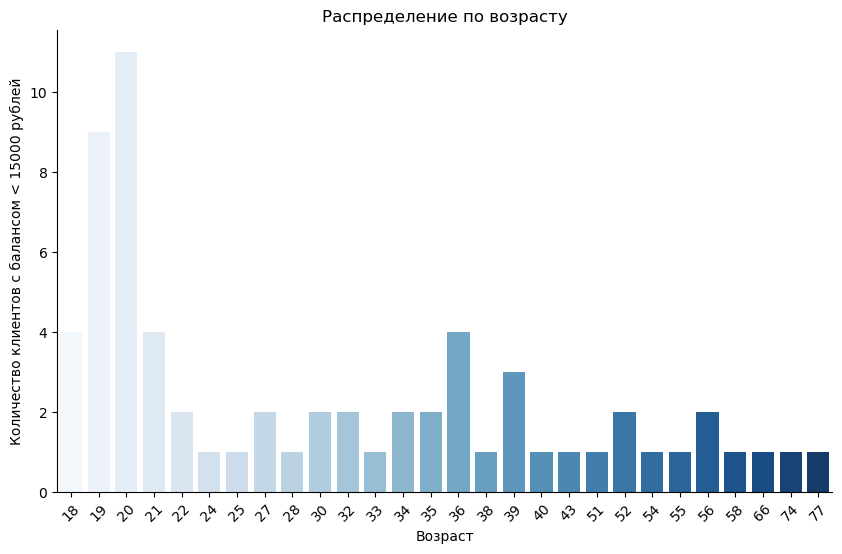

In [41]:
# Посмотрим на возраст тех, у кого баланс меньше, например, 15 тыс. рублей
age_balance = (data
               .query('balance < 15000')
               .groupby(['age'])
               .agg({'user_id':'nunique'})
               .reset_index()
               .sort_values(by='age'))

# Построим визуализацию
plt.figure(figsize=(10, 6))
sns.barplot(data=age_balance, x='age', y='user_id', palette='Blues')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов с балансом < 15000 рублей')
plt.title('Распределение по возрасту')
plt.xticks(rotation=45)
plt.xticks(range(len(age_balance['age'])), [int(age) for age in age_balance['age']])

sns.despine()

plt.show()


Больше всего людей со сбережениями до 15 тыс. руб. в возрасте 18-20 лет. Посмотрим на тех, у кого баланс максимальный.

In [42]:
data.query('balance == 119113552.01')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7597,156149,900.0,Ярославль,М,62.0,5,1.191136e+08,2,1,1,138041.31,0


Такой клиент всего один. Баланс, конечно, неплохой, 119 млн. руб., особенно при оценочном доходе в 138 тыс.руб. Возможно, это поступление единоразовое какой-то крупной суммы от продажи чего-нибудь, т.к. баланс может в принципе никак не зависеть от оценочного дохода. Но этот клиент, конечно, аномальный. Посмотрим, у скольких клиентов баланс больше 10 млн. руб.

In [43]:
data.query('balance > 10000000').sort_values(by='age')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
125,227092,1000.0,Ярославль,М,32.0,5,1.975718e+07,2,1,1,1024626.50,0
7343,226500,969.0,Ярославль,М,32.0,3,1.282976e+07,4,1,1,544420.41,1
7109,203824,986.0,Ярославль,М,34.0,5,1.790476e+07,2,1,1,856500.86,1
4997,203575,984.0,Ярославль,М,34.0,3,1.106963e+07,1,1,1,798742.82,1
3348,193457,1000.0,Ярославль,Ж,34.0,4,1.088599e+07,4,1,1,799847.28,0
8484,221720,1000.0,Ярославль,Ж,35.0,5,2.154994e+07,2,0,0,1051902.65,0
4005,163640,912.0,Ярославль,М,35.0,4,1.562410e+07,2,0,1,1395064.45,0
6318,163663,970.0,Ярославль,М,35.0,3,1.500450e+07,2,0,1,991012.77,1
3103,203255,999.0,Ярославль,М,36.0,4,1.064115e+07,2,0,0,1042118.22,0
6948,137434,1000.0,Ярославль,М,37.0,4,2.090616e+07,2,1,1,947606.60,1


Примерно половина таких клиентов - люди 30-40 лет с высоким оценочным доходом. Возможно, они занимаются инвестированием. Часть из них уже попала в отток. Что интересно, только один клиент из Ростова, все остальные из Ярославля. Либо в Ярославле люди больше зарабатывают, либо в этом отделении есть какой-то продукт, который привлекает клиентов с высоким уровнем дохода. Удалять таких клиентов я не буду, учту эти факты при дальней сегментации.

In [44]:
# Проанализируем данные столбца products
dataset = data['products']
unique_describe(dataset)

count    10000.000000
mean         1.870100
std          0.792647
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: products, dtype: float64

'Количество уникальных значений: 6'

products
2    5126
1    3341
3    1039
4     474
5      19
Name: count, dtype: int64

Больше половины клиентов из нашего датасета пользуются 2мя продуктами банка. Непонятно, как минимальное значение продуктов может быть равно 0. Посмотрим на нулевые значения.

In [45]:
data.query('products == 0')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


Такая клиентка одна, у нее неизвестен баланс, у нее нет продуктов и нет кредитной карты, она неактивна и попала в отток. Я удалю эту строку, скорее всего эта женщина уже не является клиенткой банка.

In [46]:
data = data[data['user_id'] != 147837]

In [47]:
# Проанализируем данные столбца credit_card
dataset = data['credit_card'].copy()
unique_describe(dataset)

count    9999.000000
mean        0.680468
std         0.466319
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: credit_card, dtype: float64

'Количество уникальных значений: 2'

credit_card
1    6804
0    3195
Name: count, dtype: int64

Кредитных карт нет у почти трeти клиентов. Интересно проследить зависимость между 0 кoличеством баллов собственности и отсутствием кредитной карты.

In [48]:
len(data.query('equity == 0 & credit_card == 0'))

528

Думаю, что для одобрения кредитной карты предоставление сведений о собственности не нужно, и эти 528 клиентов, у которых нет кредиток и нет баллов собственности одновременно, это скорее совпадение.

In [49]:
# Проанализируем данные столбца last_activity
dataset = data['last_activity']
unique_describe(dataset)

count    9999.000000
mean        0.523552
std         0.499470
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: last_activity, dtype: float64

'Количество уникальных значений: 2'

last_activity
1    5235
0    4764
Name: count, dtype: int64

1 - это активные клиенты, их немногим больше половины. Активность клиентов определяется по тому признаку, совершал ли клиент какие-либо финансовые операции в отчетном периоде (предыдущий месяц), т.е. так может получиться, что если клиент пользуется только таким продуктом банка как, например, вклад под процент на длительный срок, то он вполне может попасть в неактивные клиенты на месяцы вперед.

In [50]:
# Проанализируем данные столбца est_salary
dataset = data['est_salary']
unique_describe(dataset)

count    9.999000e+03
mean     1.478792e+05
std      1.393901e+05
min      2.546300e+03
25%      7.525212e+04
50%      1.196615e+05
75%      1.745011e+05
max      1.395064e+06
Name: est_salary, dtype: float64

'Количество уникальных значений: 9995'

est_salary
49742.87     2
108250.17    2
176348.18    2
381868.89    2
75719.14     1
Name: count, dtype: int64

Видим 4 пары клиентов, у которых оценочный доход одинаковый. Посмотрим на них.

In [51]:
# Получаем список клиентов с неуникальными est_salary
non_unique_est_salary = data[data.duplicated('est_salary', keep=False)]['est_salary']

# Выводим данные о клиентах с неуникальными est_salary
non_unique_est_clients_data = data[data['est_salary'].isin(non_unique_est_salary)]
display(non_unique_est_clients_data.sort_values(by='est_salary'))

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
513,120675,832.0,Рыбинск,Ж,37.0,2,430220.82,2,1,1,49742.87,0
2442,152240,861.0,Ростов,Ж,60.0,3,599546.80,2,0,1,49742.87,0
4642,133759,831.0,Ярославль,М,50.0,5,560145.71,2,1,1,108250.17,0
6050,202056,979.0,Рыбинск,Ж,30.0,2,820572.71,3,1,0,108250.17,0
884,214629,772.0,Ярославль,М,53.0,2,335295.37,2,1,1,176348.18,0
8376,217828,947.0,Ярославль,М,30.0,5,393215.11,1,1,0,176348.18,0
4343,141945,929.0,Рыбинск,М,33.0,0,NaN,1,1,0,381868.89,0
9457,141945,929.0,Ярославль,М,33.0,0,NaN,1,1,0,381868.89,0


Удивительно, конечно, но возможный дубликат тут, скорее всего, только один, его мы видели раньше. Ничего с этими данными не делаем.

In [52]:
# Посмотрим на клиентов, у которых оценочный доход минимальный
data.query('est_salary == 2546.3')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8783,114221,948.0,Ярославль,Ж,26.0,1,77092.89,1,1,0,2546.3,0


Девушка пользуется только одним продуктом банка и это кредитная карта. И поступления на счет - это скорее всего платежи по погашению задолженности по кредитной карте. Судя по наличию баланса, вероятно есть кредитные карты с собственными средствами и без них.

In [53]:
# Посмотрим на клиентов, у которых оценочный доход максимальный
data.query('est_salary == 1395064.45')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4005,163640,912.0,Ярославль,М,35.0,4,15624095.8,2,0,1,1395064.45,0


Вот мне интересно все-таки, как начисляются баллы кредитного скоринга. У клиента с высоким уровнем дохода и балансом, и количеством баллов собственности 4, скоринговый балл ниже, чем у девушки с минимальным доходом и баллом собственности - 1...

In [54]:
# Проанализируем данные столбца churn
dataset = data['churn']
unique_describe(dataset)

count    9999.000000
mean        0.181918
std         0.385796
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64

'Количество уникальных значений: 2'

churn
0    8180
1    1819
Name: count, dtype: int64

Ушедших в отток в среднем 18.2% по банку.

In [55]:
# Посмотрим на выбросы с помощью 1, 5, 50, 95 и 99 перцентилей

# Выберем столбцы 
selected_columns = ['score', 'age', 'equity', 'balance', 'products', 'est_salary']

(data[selected_columns]
 .describe([0.01, 0.05, 0.95, 0.99])
 .T
 .assign(mean_to_std=lambda row: row['mean'] / row['std']).round(1))

,count,mean,std,min,1%,5%,50%,95%,99%,max,mean_to_std
score,9999.0,848.7,65.4,642.0,687.0,737.0,853.0,945.1,978.0,1000.0,13.0
age,9974.0,42.7,12.2,18.0,23.0,26.0,40.0,65.0,73.0,86.0,3.5
equity,9999.0,2.6,2.0,0.0,0.0,0.0,3.0,5.0,7.0,9.0,1.3
balance,7705.0,827794.3,1980614.1,0.0,23267.4,100104.3,524272.2,2116704.8,4827443.5,119113552.0,0.4
products,9999.0,1.9,0.8,1.0,1.0,1.0,2.0,3.0,4.0,5.0,2.4
est_salary,9999.0,147879.2,139390.1,2546.3,17348.7,32169.5,119661.5,316885.6,887938.8,1395064.4,1.1


Собственно, как и ожидалось, аномальных значений много как в меньшую сторону, так и в большую. Отношение среднего в стандартному отклонению позволяет счиать, что значимые аномалии есть в столбцах score, age, products. Но я буду работать максимально без удаления данных, потому что на данный момент не могу еще делать выводы, какие именно признаки влияют на отток клиентов.

#### Добавление новых признаков

In [56]:
# Добавим столбец для анализа пропусков в age
data['age_missing_vals'] = data['age'].isnull().astype(int)

In [57]:
# Добавим столбец для анализа пропусков в balance
data['bal_missing_vals'] = data['balance'].isnull().astype(int)

In [58]:
# Добавим столбец products_without_credit для подсчета количества продуктов без кредитной карты
data['products_without_credit'] = data['products'] - data['credit_card']

In [59]:
# Добавим столбец для категоризации возраста в balance по 10 лет
data['age_category'] = data["age"] // 10 * 10

#### Кодирование данных категориальных столбцов с помощью pd.get_dummies

In [60]:
# Кодируем данные
data_encoded = pd.get_dummies(data, columns=['city', 'gender'])
# Добавляем столбцы с незакодированными данными обратно в датасет
data_encoded['city'] = data['city'] 
data_encoded['gender'] = data['gender']
# Переименуем столбцы
data_encoded = data_encoded.rename(columns = {'gender_Ж':'female', 
                                              'gender_М': 'male',
                                              'city_Ростов':'rostov',
                                              'city_Рыбинск':'rybinsk',
                                              'city_Ярославль': 'yaroslavl'})
data_encoded.head()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,...,bal_missing_vals,products_without_credit,age_category,rostov,rybinsk,yaroslavl,female,male,city,gender
0,183012,850.0,25.0,1,59214.82,2,0,1,75719.14,1,...,0,2,20.0,False,True,False,True,False,Рыбинск,Ж
1,146556,861.0,37.0,5,850594.33,3,1,0,86621.77,0,...,0,2,30.0,False,True,False,True,False,Рыбинск,Ж
2,120722,892.0,30.0,0,NaN,1,1,1,107683.34,0,...,1,0,30.0,False,True,False,True,False,Рыбинск,Ж
3,225363,866.0,51.0,5,1524746.26,2,0,1,174423.53,1,...,0,2,50.0,False,False,True,True,False,Ярославль,Ж
4,157978,730.0,34.0,5,174.00,1,1,0,67353.16,1,...,0,0,30.0,False,False,True,False,True,Ярославль,М


#### Kорреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix.

##### Анализ пропусков в стобце age

In [61]:
# Посмотрим на средние значения признаков по двум группам - тех, у кого есть пропуски в age и тех, у кого нет
continuous_cols = ['score', 'balance', 'est_salary']
discrete_cols = ['equity', 'products', 'products_without_credit']
binary_cols = ['rostov', 'rybinsk', 'yaroslavl', 'female', 'male', 'credit_card', 'last_activity', 'churn']
object_cols = ['gender', 'city']

# Вызываем функцию для подсчета средних значений в выбранных столбцах
age_means = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, data_encoded, 
            'age_missing_vals')

# Посчитаем те же метрики для всего датасета
age_initial = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, data_encoded, 
            lambda x: 0)

# Добавим их к age_means
age_means = pd.concat([age_means, age_initial], axis=1)

age_means.drop(labels=['age_missing_vals', 'index'], inplace=True)                
age_means.columns = ['not_missed', 'missed', 'age_initial']
age_means

,not_missed,missed,age_initial
score,853.0,884.0,853.0
balance,524295.33,417361.12,524272.2
est_salary,119648.88,137500.77,119661.51
equity,2.63,1.44,2.63
products,1.87,1.36,1.87
products_without_credit,1.19,0.6,1.19
rostov,0.14,0.04,0.14
rybinsk,0.27,0.48,0.27
yaroslavl,0.59,0.48,0.59
female,0.5,0.48,0.5


Средние значения в столбце без пропусков по возрасту минимально отличаются от средних значений по первоначальному столбцу age в столбцах balance и est_salary. В столбце, где есть пропуски, ниже средний баланс и средний оценочный доход, при этом более, чем для половины клиентов, единственный продукт  - это кредитная карта, активность выше и предбладают клиенты Рыбинска.

##### Анализ пропусков в стобце balance

In [62]:
# Посмотрим на средние значения признаков по двум группам - тех, у кого есть пропуски в balance и тех, у кого нет
continuous_cols = ['score', 'age', 'est_salary']
discrete_cols = ['equity', 'products']
binary_cols = ['rostov', 'rybinsk', 'yaroslavl', 'female', 'male', 'products_without_credit',
                    'credit_card', 'last_activity', 'churn']
object_cols = ['gender', 'city']

# Вызываем функцию для подсчета средних значений в выбранных столбцах
balance_means = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, data_encoded, 
            'bal_missing_vals')

# Посчитаем те же метрики для всего датасета
balance_initial = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, data_encoded, 
            lambda x: 0)

# Добавим их к balance_means
balance_means = pd.concat([balance_means, age_initial], axis=1)
balance_means.drop(labels=['bal_missing_vals', 'balance', 'index'], inplace=True)
balance_means.columns = ['not_missed', 'missed', 'balance_initial']
balance_means

,not_missed,missed,balance_initial
score,840.0,903.0,853.0
age,40.0,40.0,NaN
est_salary,106222.2,174202.8,119661.51
equity,3.4,0.05,2.63
products,2.08,1.16,1.87
rostov,0.15,0.1,0.14
rybinsk,0.27,0.26,0.27
yaroslavl,0.57,0.64,0.59
female,0.52,0.44,0.5
male,0.48,0.56,0.5


Средние значения в столбце без пропусков отличаются от средних значений по первоначальному столбцу balance,особенно это касается score и est_salary, больше женщин, чем мужчин. В столбце, где есть пропуски,  выше средний скоринговый балл и средний оценочный доход, больше клиентов мужчин и преобладают клиенты Ярославля.

#### Корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix

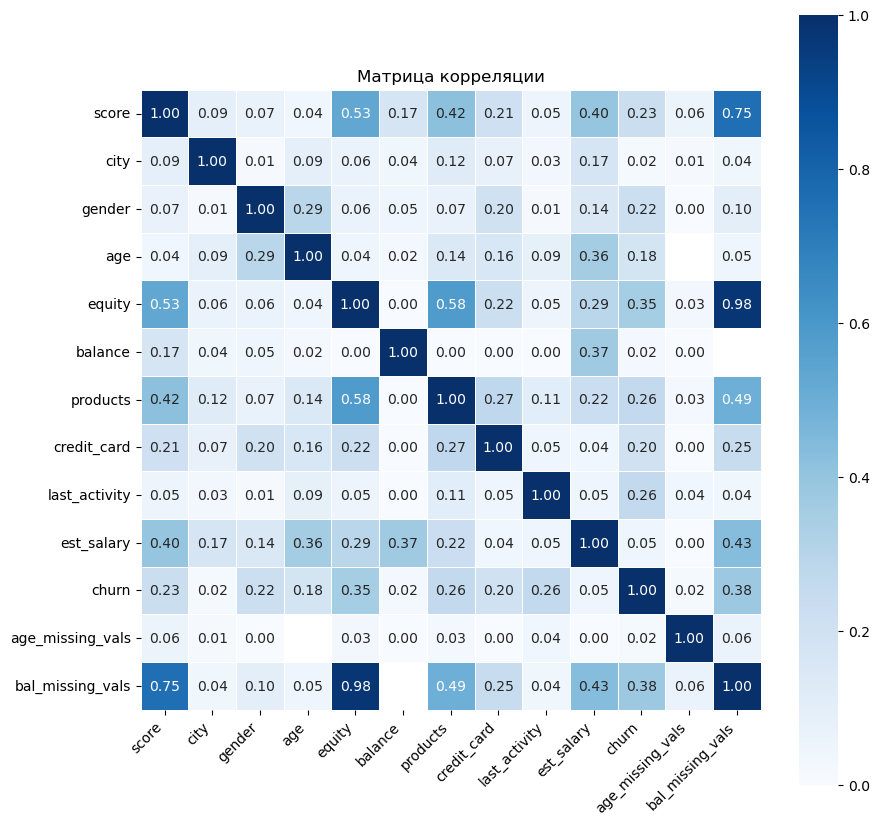

In [63]:
# Вычисляем phik matrix для заданных столбцов
# Удаляем столбцы, которые нам для корреляционного анализа не нужны
data_matrix = data.drop(columns=['user_id', 'age_category', 'products_without_credit'], axis=1)

matrix = data_matrix.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'])

# Строим тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, square=True)
plt.title('Матрица корреляции')
plt.xticks(rotation=45, ha='right')

plt.show()

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> Таблица интерпретации значений корреляции:</b>
 
![avatar](https://www.ok-t.ru/studopediaru/baza17/1942458671852.files/image012.gif)
</div>


Пропуски в столбце age не имеют значимой корреляции с другими признаками. А вот пропуски в столбце balance показывают весьма высокую корреляцию с признаком equity (0.98), высокую с признаком score (0.75), умеренную с products (0.49), est_salary (0.43), churn (0.38). Если учесть, что данные по столбцам score, equity и est_salary предоставляются банку внешней организацией, то вероятно наши пропуски относятся к категории "пропусков, имеющих значение". Возможно, все эти люди с пропусками являются сотрудниками одной организации, у которой с банком зарплатный проект, и данные по балансу не отображаются. Но наверняка мы ничего сказать не можем. Я оставлю в данных все пропуски без изменений.

In [64]:
# Изменим тип данных в столбцах balance и age на float64 с учетом пропусков 
data['balance'] = pd.to_numeric(data['balance'], errors='coerce')
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [65]:
# Сверяем наши данные по количеству строк по окончанию обработки данных в датасете.
a, b = len(temp), len(data)
print(len(temp), len(data), round((a - b) / a * 100, 2))

10000 9999 0.01


**Вывод:**

В рамках этапа предобработки данных были сделаны следующие изменения:
- названия столбцов были преобразованы к нижнему регистру и было изменено название столбца userid на user_id;
- данные в стобцах были проверены на пропуски, в столбце age было найдено 26 пропущенных значений, 1 из них удалось дозаполнить, сравнив данные по столбцу user_id, в столбце balance обнаружено почти 23 процента пропусков;
- данные проверены на наличие дубликатов. Явные дубликаты отсутствуют;
- достоверность возможных неявных дубликатов мы проверить не можем;
- изучены уникальные значения в стобцах;
- обнаружили, что 73 пары клиентов имеют не уникальный повторяющийся с другими клиентами id, такая ситуация возможно, так как базы данных отделений не зависят друг от друга;
- удалили строку, в которой количество продуктов равно 0;
- создали четыре новых столбца:
  - столбец products_without_credit - посчитали, каким количеством продуктов пользуются клиенты без учета кредитной карты;
  - столбец age_missing_vals - необходим для анализа природы пропусков в столбце age, где 0 - непропущенное значение, 1 - пропущенное значение;
  - столбец bal_missing_vals - необходим для анализа природы пропусков в столбце balance, где 0 - непропущенное значение, 1 - пропущенное значение;
  - столбец age_category - категоризация возраста по 10 лет.
- произвели кодирование данных в столбцах gender и city;
- провели корреляционный анализ пропусков в стобцах age и balance:
  - пропуски в столбце age не имеют существенной корреляции с другими признаками, оставили их как есть;
  - пропуски в столбце balance имеют существенную корреляцию с признаками equity (0.98), score (0.75), products (0.49), est_salary (0.43), churn (0.38). Значит, они неслучайные, также оставим их без изменений.

[Возврат к описанию проекта](#toc)

<a id="4"></a>
### Исследовательский анализ данных

##### Определяем функции для визуализации распределения столбцов с различными данными

In [98]:
# Определим функцию для построения столбчатых гистограмм и диаграмм размаха для столбцов с 
# непрерывными данными
def plots_for_numerical_data(data, feature, target_feature, label1, label2, xlabel, xticklabels):
    '''
    Функция предназначена для визуализации непрерывных данных:
    - используем функцию plt.subplots для создания фигуры и массива подзаголовков. Указываем, что у нас 
    будет 1 строка и 2 столбца (nrows=1, ncols=2), что означает, что у нас будет два графика рядом друг с другом. 
    Также указываем размеры фигуры (figsize=(15, 8));
    - используем sns.kdeplot для построения графика для значений признака feature, разделенных по 
    значениям целевого признака target_feature;
    - гистограммы для двух значений target_feature (0 и 1) строятся на одном графике;
    - устанавливаем заголовок (set_title), метки осей (set_xlabel, set_ylabel) и легенду (legend) для 
    обозначения соответствия между гистограммами и значениями целевого признака;
    - используем sns.boxplot для построения диаграммы размаха для значений признака feature, разделенных по 
    значениям целевого признака target_feature;
    - каждой категории в target_feature (0 и 1) соответствует ящик с усами на графике, отображающий 
    интерквартильный размах и медиану. Устанавливаем заголовок (set_title), метки осей (set_xlabel, set_ylabel), 
    метки для значений по оси x (set_xticks, set_xticklabels), которые соответствуют значениям целевого признака, 
    и название легенды.
    - используем suptitle для добавления общего заголовка к графикам;
    - используем sns.despine() для удаления основных и правых рамок графика;
    - используем plt.tight_layout() для улучшения расположения подзаголовков на графике;
    - используем plt.show() для отображения созданных графиков.
    '''
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    axes = axes.flatten()
    
    # Построение графиков
    sns.kdeplot(data=data[data[target_feature]==0][feature], ax=axes[0], label=label1,
            color='blue', common_norm=False, bw_adjust=0.5, fill=True)
    sns.kdeplot(data=data[data[target_feature]==1][feature], ax=axes[0], label=label2, 
            color='green', common_norm=False, bw_adjust=0.5, fill=True)
    axes[0].set_title(f'Распределение для признака "{feature}"')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Частота')
    axes[0].legend()
    
    # Построение диаграммы размаха
    sns.boxplot(data=data, x=target_feature, y=feature, hue=target_feature, ax=axes[1], 
                palette=['lightblue', 'lightgreen'], showmeans=True) 
    axes[1].set_title(f'Диаграмма размаха для признака "{feature}"')
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(feature)  
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(xticklabels)
    
    plt.suptitle(f'Анализ признака "{feature}"', y=1.02, fontsize=16)
    
    sns.despine()
    plt.tight_layout()    
    
    plt.show()   

In [99]:
# Определим функцию для построения визуализации для столбцов с дискретными и бинарными данными
def plots_for_binary_discrete_data(data, feature, target_feature):
    '''
    Функция предназначена для визуализации дискретных данных и бинарных данных:
    - используем функцию plt.subplots для создания фигуры и массива подзаголовков. Указываем, что у нас 
    будет 1 строка и 2 столбца (nrows=1, ncols=2), что означает, что у нас будет два графика рядом друг с другом. 
    Также указываем размеры фигуры (figsize=(15, 8));
    - преобразуем массив осей в одномерный массив, удобный для последующего использования с помощью 
    axes = axes.flatten();
    - cтроим столбчатую диаграмму с использованием sns.barplot, где по оси x отображаются значения признака 
    feature, по оси y отображается target_feature, а каждый столбец представляет собой частоту встречаемости 
    target_feature для каждого для каждого уникального значения признака. График отображается на первой оси 
    axes[0];
    - cтроим точечный график с использованием sns.pointplot, где по оси x отображаются значения признака feature, 
    а по оси y отображается target_feature. Каждая точка представляет собой среднее значение target_feature для 
    каждого уникального значения признака. График отображается на второй оси axes[1];
    - используем suptitle для добавления общего заголовка к графикам;
    - используем sns.despine для удаления основных и правых рамок графика;
    - используем plt.tight_layout() для улучшения расположения подзаголовков на графике;
    - используем plt.show() для отображения созданных графиков.
    '''
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    axes = axes.flatten()
    
    # Построение графиков
    sns.barplot(data=data, x=feature, y=target_feature, ax=axes[0], color='lightblue')
    axes[0].set_title(f'Отток по признаку {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Частота')

    sns.pointplot(data=data, x=feature, y=target_feature, ax=axes[1], color='lightblue')
    axes[1].set_title(f'Отток по признаку {feature}')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Отток')
       
    plt.suptitle(f'Анализ признака "{feature}"', y=1.02, fontsize=16)
    
    sns.despine()
    plt.tight_layout()    
    
    plt.show()  

#### Анализ распределения признаков в разрезе оттока

In [68]:
# Посмотрим на средние значения признаков по двум группам - тех, кто ушел, и тех, кто остался
continuous_cols = ['score', 'age', 'balance', 'est_salary']
discrete_cols = ['equity', 'products', 'products_without_credit']
binary_cols = ['rostov', 'rybinsk', 'yaroslavl', 'female', 'male', 'credit_card', 'last_activity']
object_cols = ['gender', 'city']

# Вызываем функцию для подсчета средних значений в выбранных столбцах
churn_means = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, data_encoded, 
            'churn')
churn_means

,0,1
churn,0,1
score,848.0,866.0
age,40.0,39.0
balance,475382.44,782410.47
est_salary,118257.72,125395.22
equity,2.37,3.76
products,1.76,2.38
products_without_credit,1.05,1.83
rostov,0.14,0.15
rybinsk,0.28,0.24


Изучив средние значения по группам, предварительно можно сказать, что в отток попало больше тех, у кого:

- скоринговый рейтинг выше (866);
- средний возраст ниже, чем у тех, кто не попал в отток - 39 лет;
- средний баланс выше на примерно треть;
- средний оценочный доход выше, но различия минимальны;
- баллов собственности в среднем больше (3.76);
- количество продуктов без кредитной карты выше почти на позицию у отточных клиентов (1.83);
- кредитной картой пользуются меньше клиентов, чем среди тех, кто не попал в отток (55%);
- пол в оттоке преобладает мужской (65%);
- самый большой отток в Ярославском отделении банка;
- больше активных клиентов в оттоке, чем неактивных (70%).

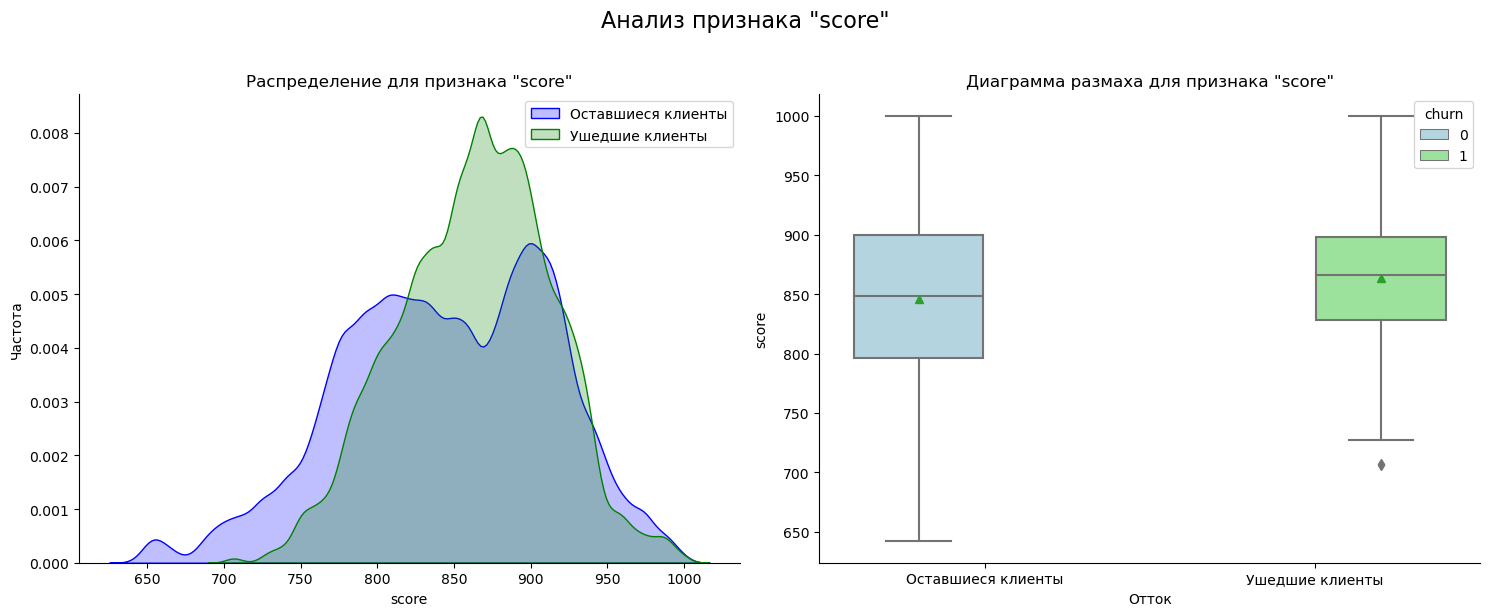

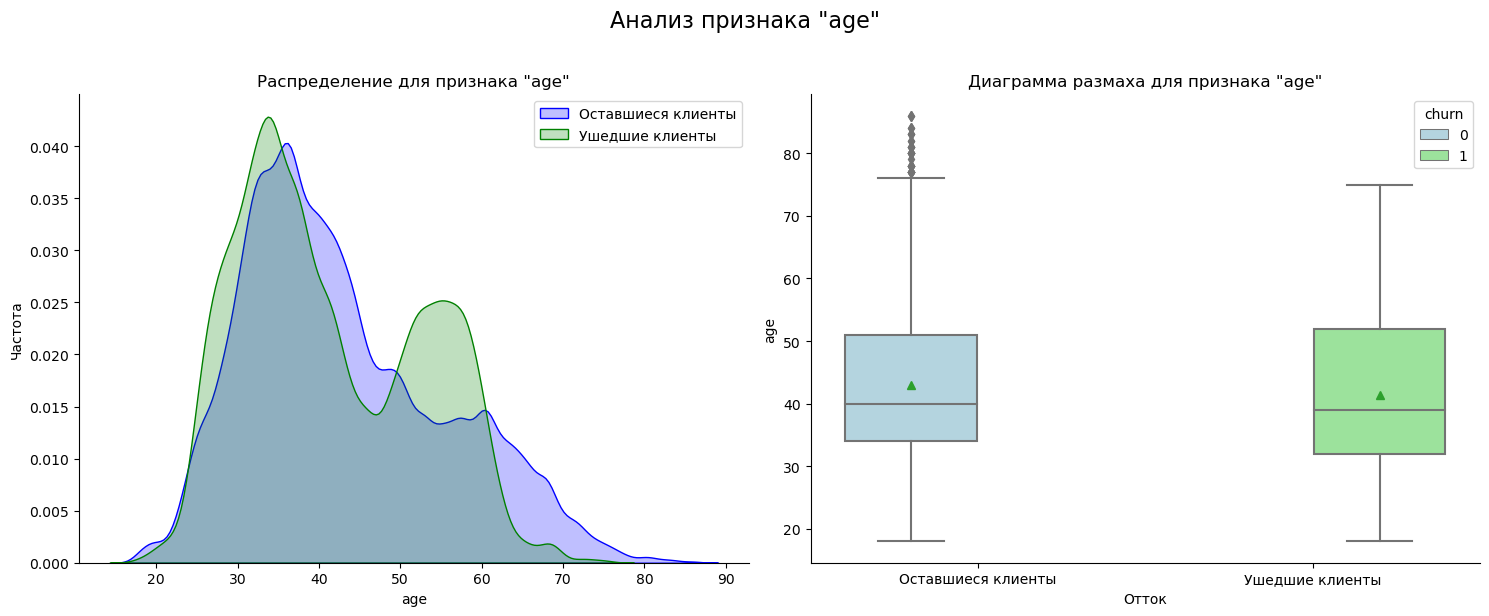

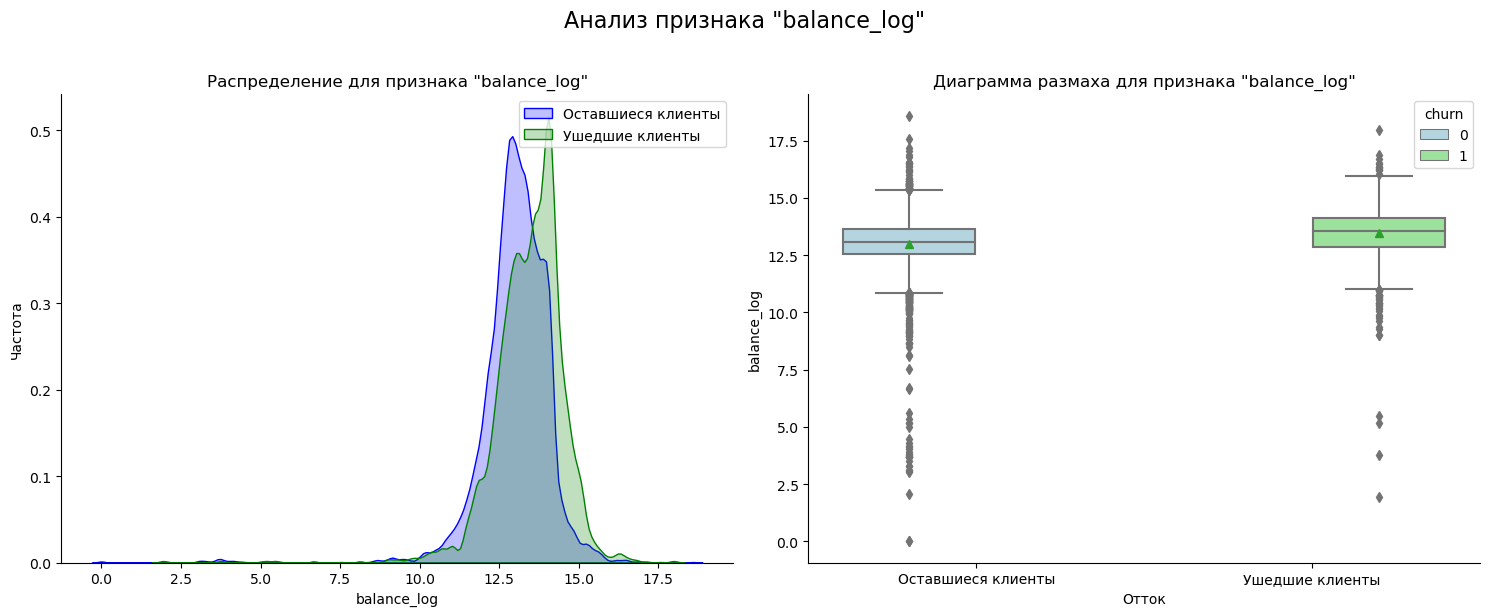

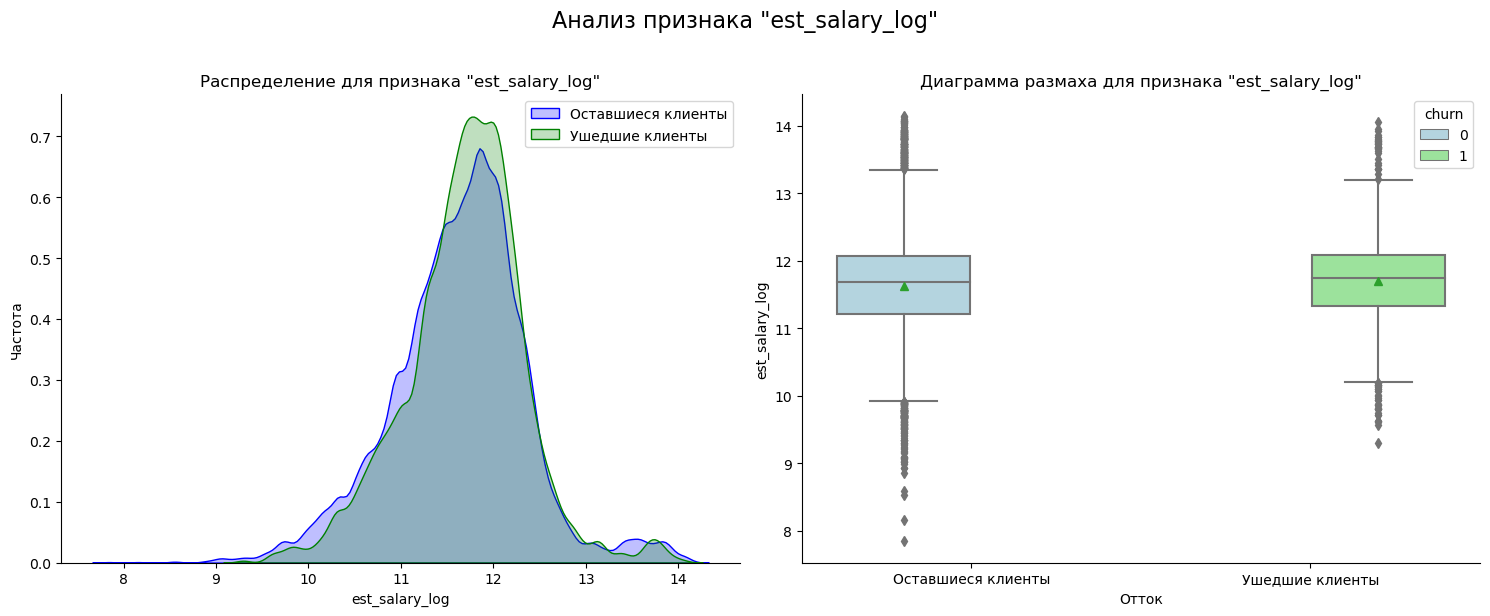

In [100]:
# Визуализируем анализ распределения признаков в разрезе оттока по непрерывным данным. Из-за наличия выбросов корректируем графики 
# по балансу и оценочному доходу c помощью np.log1p = log(x + 1) - чтобы можно было брать логарифм от 0
data_encoded_correct  = data_encoded.assign(balance_log=lambda row: np.log1p(row['balance']),
                            est_salary_log=lambda row: np.log1p(row['est_salary']))

continuous_cols = ['score', 'age', 'balance_log', 'est_salary_log']
for feature in continuous_cols:
    plots_for_numerical_data(data_encoded_correct, feature, 'churn', 'Оставшиеся клиенты', 'Ушедшие клиенты', 
                             'Отток', ['Оставшиеся клиенты', 'Ушедшие клиенты'])


In [70]:
# Переведем полученное значение логарифма по балансу обратно к исходным данным
display(round(np.exp(13.5),1))

729416.4

In [71]:
# Переведем полученное значение логарифма по оценочному доходу обратно к исходным данным
display(round(np.exp(11.5),1))
display(round(np.exp(12.5),1))

98715.8

268337.3

Изучив наши графики, можно сказать следующее:
- отток выше при скоринговом балле примерно от 860;
- отток выше в возрастных категориях 25-37  и 50-60 лет;
- отток выше при более высоком балансе, примерно от 13.5, если использовать логарифмическую шкалу, или от 729416.4 руб. по исходным данным;
- отток выше при более высоком среднем оценочном доходе от 11.5. до 12.5, если использовать логарифмическую шкалу, или примерно от 98715.8 руб. до 268337.3 руб. по исходным данным.

Посчитаем фактический отток по дискретным и бинарным данным. 

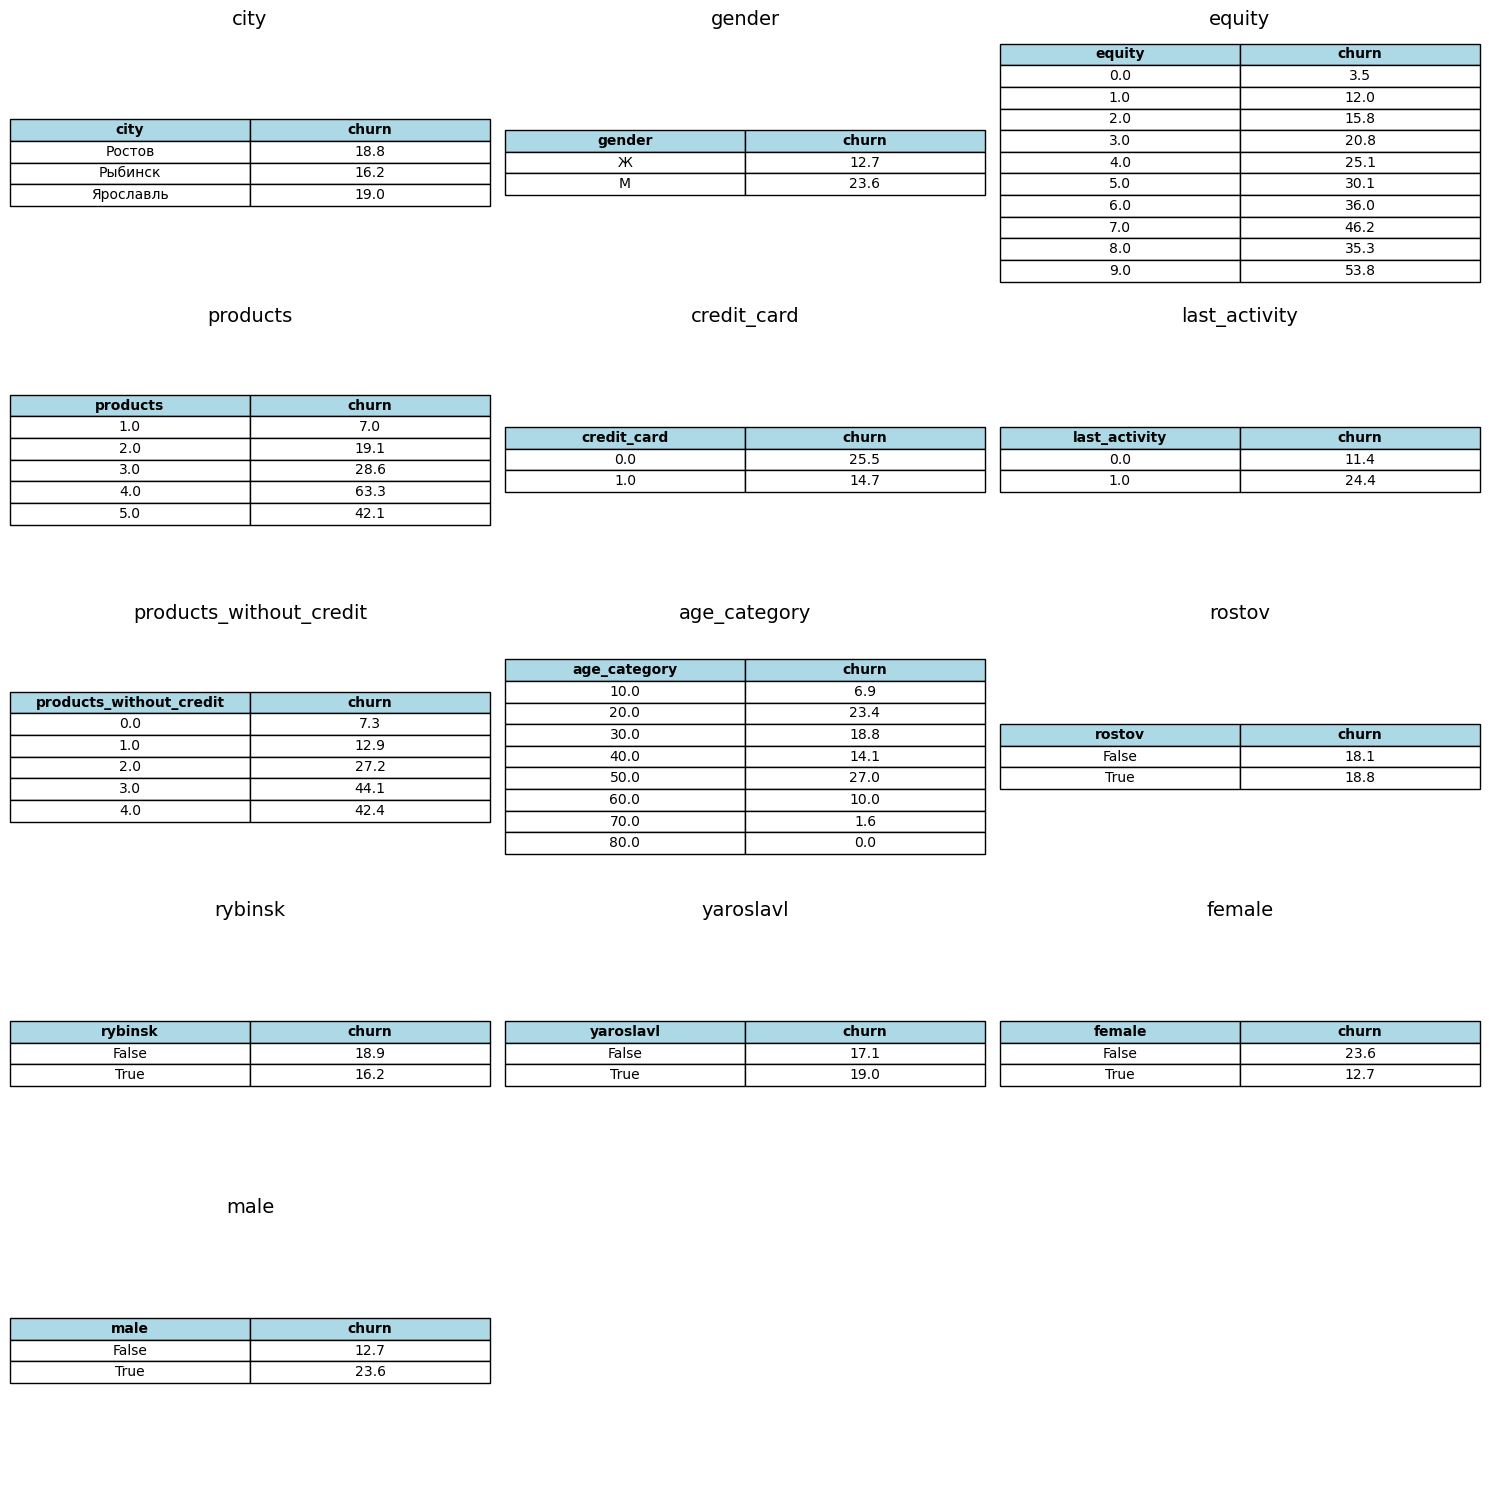

In [72]:
# Выбираем нужные столбцы
selected_columns = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity', 
                    'products_without_credit', 'age_category', 'rostov', 'rybinsk', 'yaroslavl', 
                    'female', 'male']

# Создаем пустой словарь для хранения результатов
churn_means = {}

# Цикл для подсчета среднего оттока для каждого столбца
for col in selected_columns:
    churn_mean = round(data_encoded.groupby(col)['churn'].mean() * 100, 1)

    churn_means[col] = churn_mean

# Визуализируем результат в виде таблиц
# Определяем количество строк и столбцов на рисунке
num_keys = len(churn_means)
num_cols = 3  # Желаемое количество столбцов

# Вычисляем количество строк
num_rows = math.ceil(num_keys / num_cols)

# Создаем фигуру и ось для отображения таблиц
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 15))

# Счетчик для размещения таблиц на рисунке
row = 0
col = 0

# Перебираем ключи и значения словаря
for key, value in churn_means.items():
    # Создаем таблицу для каждой пары ключ-значение
    table = axes[row, col].table(cellText=value.reset_index().values, 
                                 colLabels=value.reset_index().columns,
                                 cellLoc='center',
                                 loc='center')
    axes[row, col].axis('off')
    axes[row, col].set_title(key, fontsize=14)
    
    # Настраиваем цвета шапки таблицы
    table.auto_set_font_size(False)
    table.set_fontsize(10) 
    for (i, j), cell in table.get_celld().items():
        if i == 0:
            cell.set_text_props(fontweight='bold')
            cell.set_facecolor('lightblue')

    # Обновляем счетчик для следующей позиции
    col += 1
    if col == num_cols:
        col = 0
        row += 1
        
# Скроем пустую рамку в конце вывода
for i in range(len(selected_columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

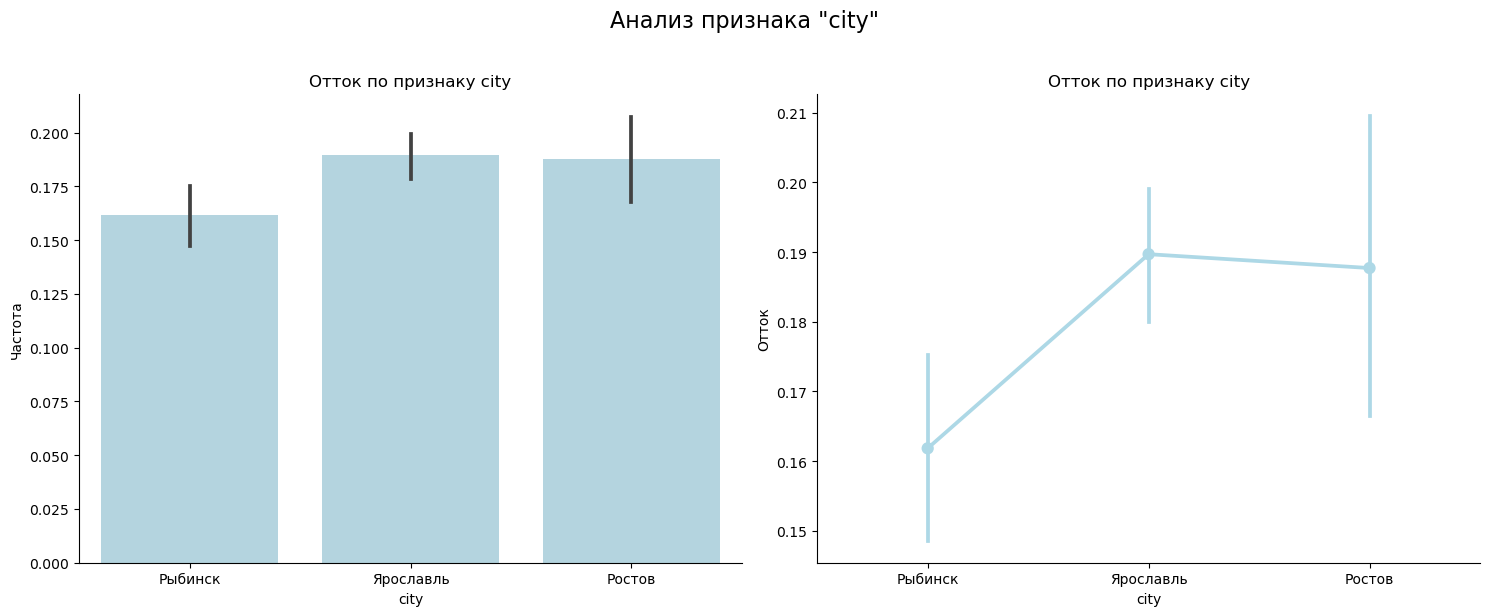

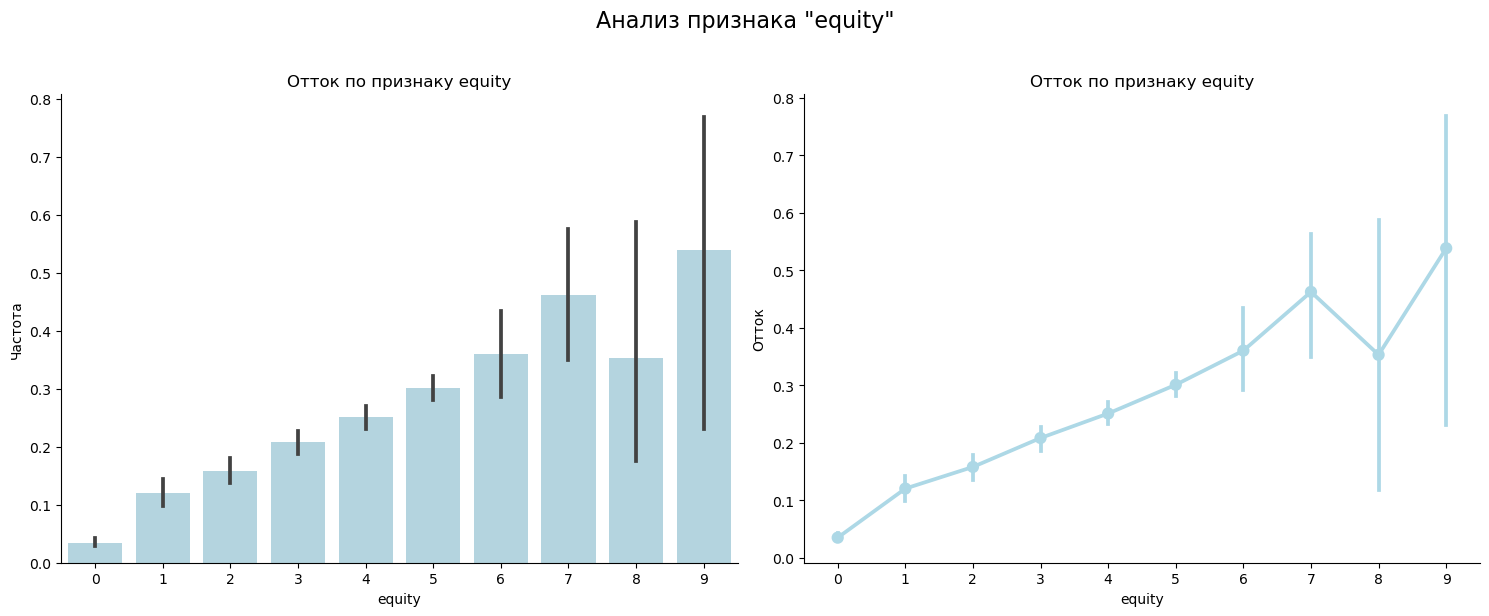

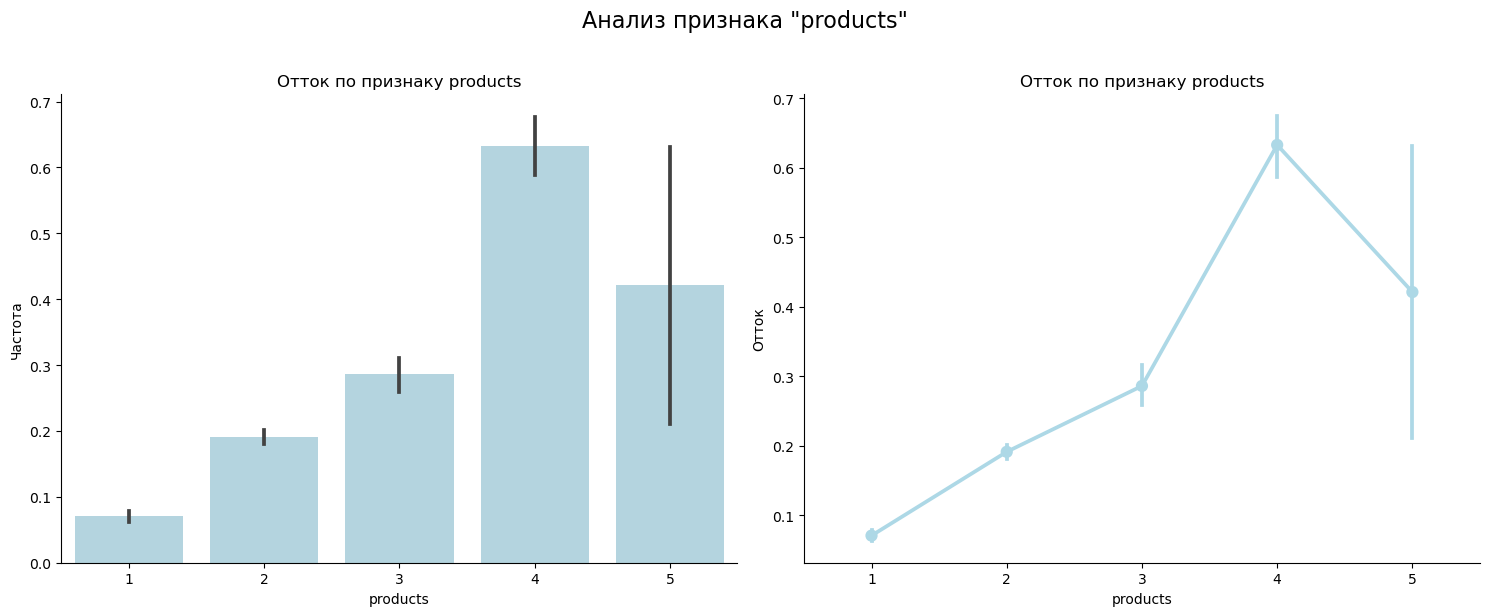

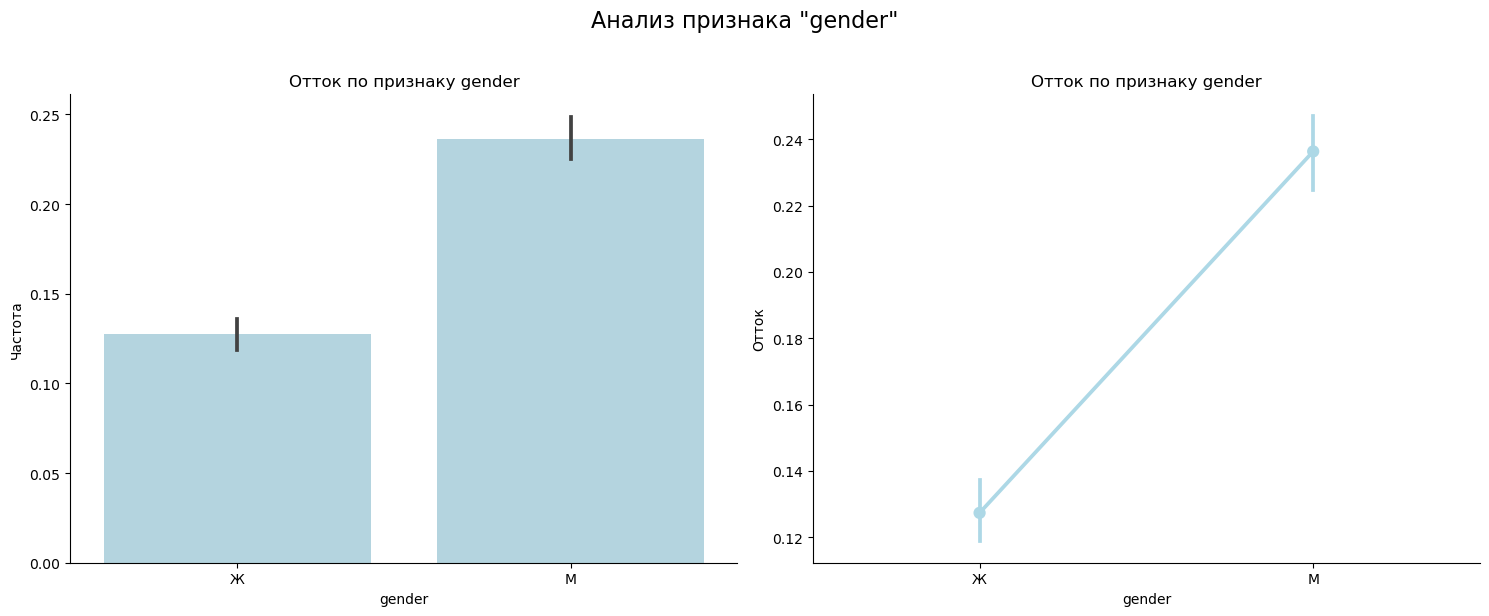

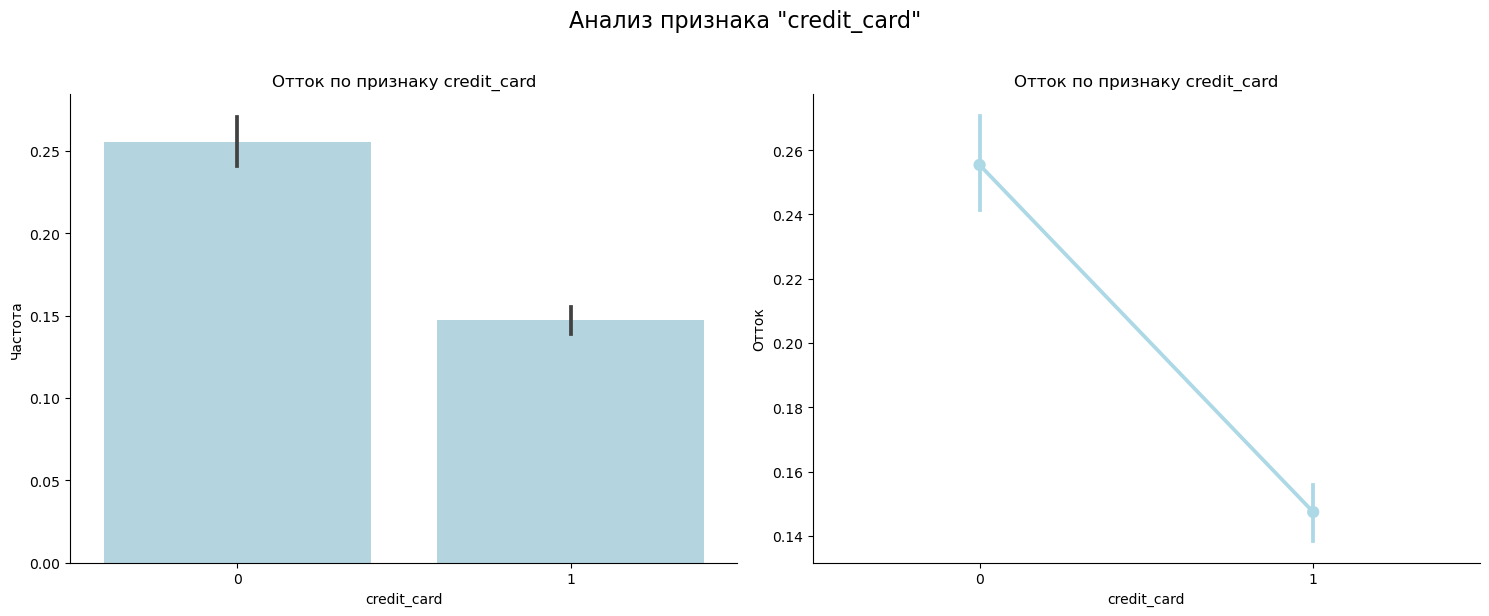

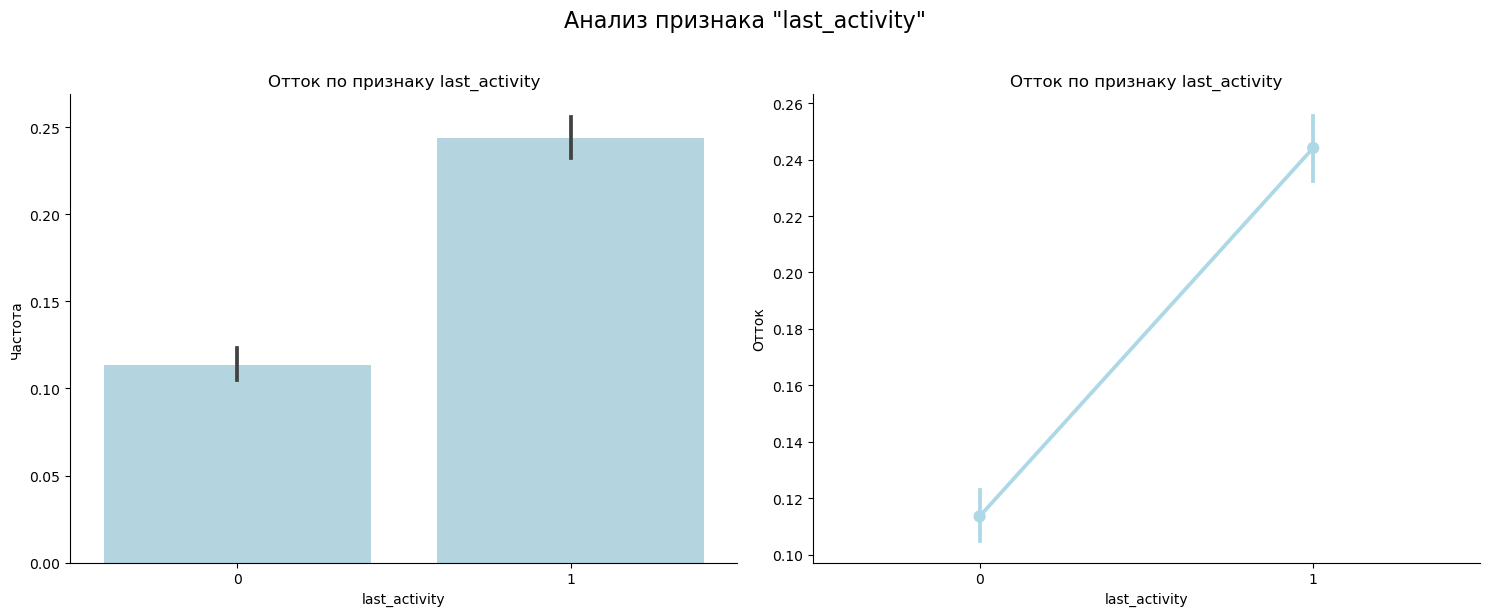

In [101]:
# Визуализируем анализ распределения признаков в разрезе оттока по дискретным и бинарным данным
# Выбираем нужные столбцы
discrete_cols = ['city', 'equity', 'products']
for feature in discrete_cols:
    plots_for_binary_discrete_data(data, feature, 'churn')

binary_cols = ['gender', 'credit_card', 'last_activity']
for feature in binary_cols:
    plots_for_binary_discrete_data(data, feature, 'churn')


Итак, самый высокий отток у нас в следующих категориях:
- город: Ярославль - 19%;
- пол: мужской - 23.6%;
- баллы собственности: топ3 - 9 (58.3%), 7 (46.2%), 6 (36%);
- продукты: 4 - 63.3%;
- отсутствие кредитной карты: 25.5%;
- активные клиенты: 24.4%;
- возрастная категория: топ3 - 50 (27%), 20 (23.4%), 30 (18.8%);

#### Анализ портретов клиентов в разрезе оттока по количеству потребляемых продуктов

In [74]:
# Сгруппируем данные по количеству потребляемых продуктов и оттоку
products_churn = (data
                  .groupby(['products', 'churn']).size().unstack(fill_value=0).reset_index()
                  .rename(columns={0: 'not_churn', 1: 'churn'})
                  .rename_axis(None, axis=1))

# Добавляем столбец для доли оттока
products_churn['churn_rate'] = round(products_churn['churn'] / \
                                     (products_churn['not_churn'] + products_churn['churn']) * 100, 1)

products_churn

,products,not_churn,churn,churn_rate
0,1,3106,235,7.0
1,2,4147,979,19.1
2,3,742,297,28.6
3,4,174,300,63.3
4,5,11,8,42.1


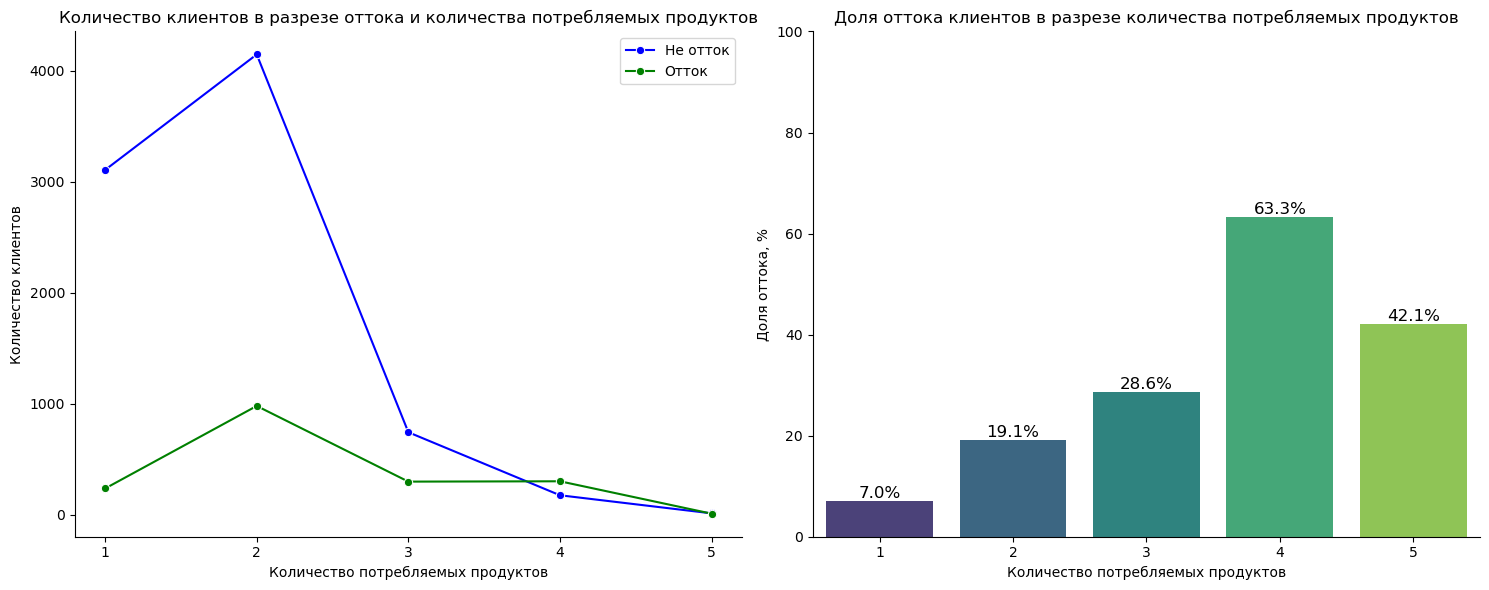

In [102]:
# Визуализируем распределение оттока по количеству потребляемых продуктов
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Линейный график
x = products_churn['products']
y1 = products_churn['not_churn']
y2 = products_churn['churn']
sns.lineplot(x=x, y=y1, label='Не отток', marker='o', linestyle='-', color='blue', ax=axes[0])
sns.lineplot(x=x, y=y2, label='Отток', marker='o', linestyle='-', color='green', ax=axes[0])
axes[0].set_title('Количество клиентов в разрезе оттока и количества потребляемых продуктов')
axes[0].set_xlabel('Количество потребляемых продуктов')
axes[0].set_ylabel('Количество клиентов')
axes[0].set_xticks(x)
axes[0].legend()

# Столбчатая диаграмма
sns.barplot(data=products_churn, x='products', y='churn_rate', palette='viridis', ax=axes[1])

# Добавление подписей с процентами доли оттока
for index, row in products_churn.iterrows():
    axes[1].text(index, row['churn_rate'], f"{row['churn_rate']:.1f}%", 
                 ha='center', color='black', va='bottom', fontsize=12)

axes[1].set_title('Доля оттока клиентов в разрезе количества потребляемых продуктов')
axes[1].set_xlabel('Количество потребляемых продуктов')
axes[1].set_ylabel('Доля оттока, %')
axes[1].set_ylim(0, 100)

plt.tight_layout()
sns.despine()
plt.show()

Мы видим, что отток у нас существенно выше для категории клиентов, пользующихся 4 продуктами. Он составляет 63.3%. Также при использовании 5 продуктов отток высокий - 42.1%. На основании наших данных сложно предположить, почему, но думаю, что дело в самих продуктах. Возможно, это высокие ставки по кредитам или низкие ставки по вкладам, или высокая "абоненская" плата по каким-то пакетам услуг, в таком случае клиенты ищут банки с лучшими условиями и уходят.

In [76]:
# Посчитаем средние значения по всем признакам в разрезе количества продуктов, которыми пользуются клиенты
continuous_cols = ['score', 'age', 'balance', 'est_salary']
discrete_cols = ['equity', 'products_without_credit', 'age_category']
binary_cols = ['rostov', 'rybinsk', 'yaroslavl', 'female', 'male', 'credit_card', 'last_activity', 'churn']
object_cols = ['gender', 'city']

# Вызываем функцию для подсчета средних значений в выбранных столбцах
product_churn_all = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, data_encoded, 
            'products')
product_churn_all

,0,1,2,3,4
products,1,2,3,4,5
score,884.0,844.0,828.0,874.0,851.0
age,40.0,40.0,42.0,38.0,37.0
balance,415369.49,514916.2,666336.6,939342.9,282262.33
est_salary,142185.24,109493.96,105625.84,122472.51,106033.79
equity,1.32,3.15,3.52,4.15,3.68
products_without_credit,0.14,1.37,2.64,3.32,4.0
age_category,37.73,38.32,41.26,35.25,31.05
rostov,0.13,0.16,0.09,0.14,0.21
rybinsk,0.26,0.3,0.16,0.21,0.05


Итак, что мы видим в этой таблице:
- портрет клиентов, которые пользуются 1 продуктом, т.е. только кредитной картой, если она есть:
  - средний скоринговый балл самый высокий - 884;
  - средний возраст - 40 лет;
  - количество баллов собственности  - 1.32;
  - 61% из них из Ярославля, 26% - из Рыбинска, 13% из Ростова;
  - по половому признаку мужчин немного больше (54%);
  - активных немного больше, чем неактивных (53%);
  - кредитная карта есть у 86% клиентов;
  - средний отток всего 7% против 18.2% в целом по банку;
  - средний оценочный доход самый высокий из 5 продуктовых категорий категорий - 142185.24 руб.;
  - средний баланс один из самых низких - 415369.49 руб.
  - возможно, что эти люди больше тратят, чем откладывают. Может быть живут от зарплаты до зарплаты, полностью расходуя средства по кредитной карте и гасят задолженность после получения заработной платы и так по кругу.
- портрет клиентов, которые пользуются 2 продуктами, одним из которых может быть кредитная карта: 
  - средний скоринговый балл - 844;
  - средний возраст - 40 лет;
  - количество баллов собственности  - 3.15;
  - 54% из них из Ярославля, 30% - из Рыбинска, 16% из Ростова;
  - по половому признаку женщин немного больше (52%);
  - кредитная карта есть у 63% клиентов;
  - активных немного больше, чем неактивных (52%);
  - отток 19% против 18.2% в целом по банку;
  - средний оценочный доход занимает третье место во выборке - 109493.96 руб.;
  - средний баланс занимает также третье место по выборке - 514916.2 руб.
  - возможно, эти клиенты помимо использования кредитной карты брали кредиты или оформляли ипотеку.
- портрет клиентов, которые пользуются 3 продуктами, среди которых кредитная карта есть у меньшинства: 
  - средний скоринговый балл самый низкий - 828;
  - средний возраст - 42 года;
  - количество баллов собственности  - 3.52;
  - 75% из них из Ярославля, 16% - из Рыбинска, 9% из Ростова;
  - женщин больше, чем мужчин (57%);
  - кредитная карта есть у 36% клиентов;
  - активных клиентов 42%;
  - отток 29% против 18.2% в целом по банку;
  - средний оценочный доход самый низкий по выборке - 105625.84 руб.;
  - средний баланс один из самых высоких по выборке - 666336.6 руб.
  - возможно, эти клиенты пользуются вкладами, инвестируют, но одновременно пользовались услугами кредитования или ипотеки и не любят кредитные карты.
- портрет клиентов, которые пользуются 4 продуктами, одним из которых которых может быть кредитная карта: 
  - средний скоринговый балл самый высокий - 874;
  - средний возраст - 38 лет;
  - количество баллов собственности  - 4.15;
  - 65% из них из Ярославля, 21% - из Рыбинска, 14% из Ростова;
  - мужчин больше, чем женщин (62%);
  - кредитная карта есть у 68% клиентов;
  - большая часть клиентов активна (79%);
  - самый высокий отток 63% против 18.2% в целом по банку;
  - средний оценочный доход один из самых высоких по выборке - 122472.51 руб.;
  - средний баланс самый высокий по выборке - 939342.9 руб;
  - это явно группа тех, кто все время мигрирует из банка в банк в поисках лучших условий для повышения уровня своего баланса. Возможно, занимаются инвестированием.
- портрет клиентов, которые пользуются 5 продуктами, одним из которых точно является кредитная карта: 
  - средний скоринговый балл  - 851;
  - средний возраст 37 лет;
  - количество баллов собственности  - 3.68;
  - 74% из них из Ярославля, 5% - из Рыбинска, 21% из Ростова;
  - мужчин немного больше, чем женщин (53%);
  - кредитная карта есть у 100% клиентов;
  - большинство клиентов активны (89%);
  - отток высокий - 42% против 18.2% в целом по банку;
  - средний оценочный доход один из самых низких по выборке - 106033.79 руб.;
  - средний баланс самый низкий по выборке - 282262.33.
  - клиенты довольно молоды, возможно, основная цель - покупка жилья, автомобиля, собственных средств не хватает, набрали кредитов, заемов, ипотек...  

#### Корреляционный анализ данных с помощью phik_matrix для поиска зависимостей для последующей сегментации клиентов банка

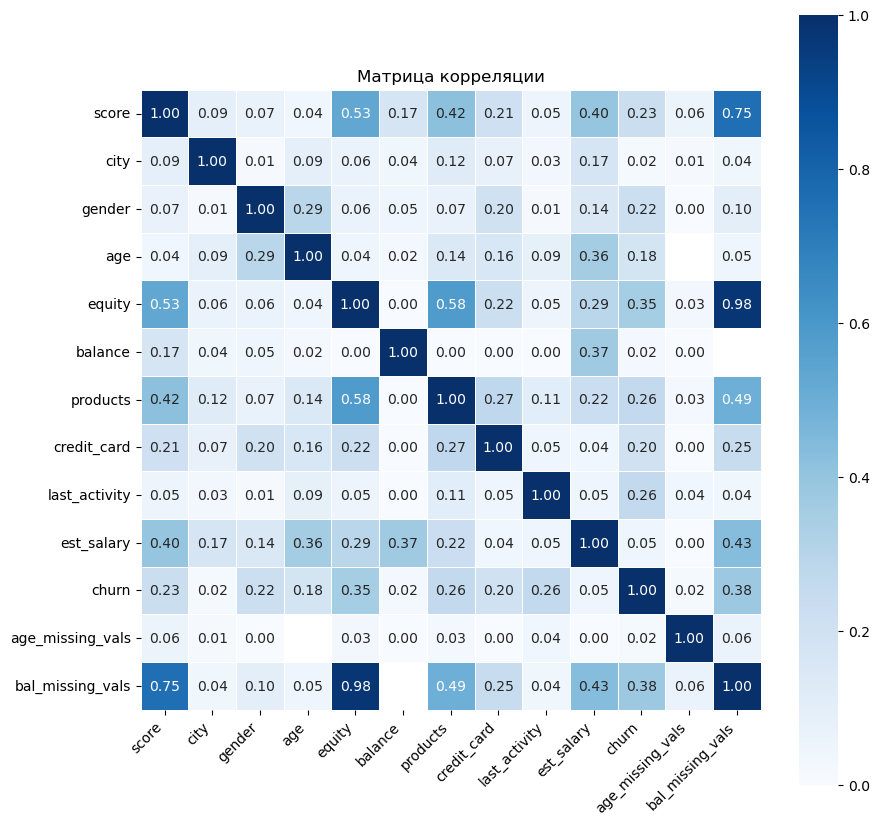

In [77]:
# Вычисляем phik matrix для заданных столбцов
# Удаляем столбцы, которые нам для корреляционного анализа не нужны
data_matrix = data.drop(columns=['user_id', 'age_category', 'products_without_credit'], axis=1)

matrix = data_matrix.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'])
# Строим тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, square=True)
plt.title('Матрица корреляции')
plt.xticks(rotation=45, ha='right')

plt.show()

Итак, мы видим умеренную и заметную корреляцию с нашими целевыми признаками в следующих данных:
- produсts и:
  - equity (58%);
  - bal_missing_vals (49%);
  - score (42%);

- churn и:
  - bal_missing_vals (38%)
  - equity (35%).
  
Также есть корреляция между другими признаками:
- equity и score (53%);
- score и est_salary (40%);
- score и bal_missing_vals (75%);
- age и est_salary (36%);
- equity и bal_missing_vals (98%);
- est_salary и bal_missing_vals (43%)
- balance и eat_salary (37%).

Если говорить о корреляции в целом, то максимальная корреляция по признакам следующая:
- score - 75% (bal_missing_vals);
- city - 17% (eat_salary);
- gender - 29% (age);
- age - 36% (eat_salary);
- equity - 98% (bal_missing_vals);
- balance - 37% (est_salary);
- products - 58% (equity);
- credit_card - 27% (products);
- last_activity - 26% (churn);
- est_salary - 43% (bal_missing_vals);
- churn - 38% (bal_missing_vals)
- age_missing_vals - 6% (score и bal_missing_vals);
- bal_missing_vals - 98% (equity).

Исходя из этого, для дальнейшей сегментации я буду использовать данные столбцов products, churn, equity, score, balance, age, также я бы хотела вынести на проверку статистическими тестами такие данные как наличие или отсутствие кредитной карты, активность клиентов и их пол.

**Вывод:**

В рамках этапа исследовательского анализа данных можно сделать следующие выводы:
- анализ распределения признаков в разрезе оттока показал, что у отточных клиентов:
  - скоринговый рейтинг выше (866);
  - средний возраст ниже, чем у тех, кто не попал в отток - 39 лет;
  - средний баланс выше на примерно треть;
  - средний оценочный доход выше, но различия минимальны;
  - баллов собственности в среднем больше (3.76);
  - количество продуктов без кредитной карты выше почти на позицию у отточных клиентов (1.83);
  - кредитной картой пользуются меньше клиентов, чем среди тех, кто не попал в отток (55%);
  - пол в оттоке преобладает мужской (65%);
  - самый большой отток в Ярославском отделении банка;
  - больше активных клиентов в оттоке, чем неактивных (70%)
- анализ портретов клиентов в разрезе оттока по количеству потребляемых продуктов показал:
  - отток у нас существенно выше для категории клиентов, пользующихся 4 продуктами. Он составляет 63.3%;
  - также при использовании 5 продуктов отток высокий - 42.1%
- портреты клиентов:
  - портрет клиентов, которые пользуются 1 продуктом, т.е. только кредитной картой. Назовем их "От зарплаты до зарплаты":
    - средний скоринговый балл самый высокий - 884;
    - средний возраст - 40 лет;
    - количество баллов собственности  - 1.32;
    - 61% из них из Ярославля, 26% - из Рыбинска, 13% из Ростова;
    - по половому признаку мужчин немного больше (54%);
    - активных немного больше, чем неактивных (53%);
    - кредитная карта есть у 86% клиентов;
    - средний отток всего 7% против 18.2% в целом по банку;
    - средний оценочный доход самый высокий из 5 продуктовых категорий категорий - 142185.24 руб.;
    - средний баланс один из самых низких - 415369.49 руб.
    - возможно, что эти люди больше тратят, чем откладывают. Может быть живут от зарплаты до зарплаты, полностью расходуя средства по кредитной карте и гасят задолженность после получения заработной платы и так по кругу.
  - портрет клиентов, которые пользуются 2 продуктами, одним из которых может быть кредитная карта. Назовем их "Ипотечники": 
    - средний скоринговый балл - 844;
    - средний возраст - 40 лет;
    - количество баллов собственности  - 3.15;
    - 54% из них из Ярославля, 30% - из Рыбинска, 16% из Ростова;
    - по половому признаку женщин немного больше (52%);
    - кредитная карта есть у 63% клиентов;
    - активных немного больше, чем неактивных (52%);
    - отток 19% против 18.2% в целом по банку;
    - средний оценочный доход занимает третье место во выборке - 109493.96 руб.;
    - средний баланс занимает также третье место по выборке - 514916.2 руб.
    - возможно, эти клиенты помимо использования кредитной карты брали кредиты или оформляли ипотеку.
  - портрет клиентов, которые пользуются 3 продуктами, среди которых кредитная карта есть у меньшиства. Назовем их "Вкладчики": 
    - средний скоринговый балл самый низкий - 828;
    - средний возраст - 42 года;
    - количество баллов собственности  - 3.52;
    - 75% из них из Ярославля, 16% - из Рыбинска, 9% из Ростова;
    - женщин больше, чем мужчин (57%);
    - кредитная карта есть у 36% клиентов;
    - активных клиентов 42%;
    - отток 29% против 18.2% в целом по банку;
    - средний оценочный доход самый низкий по выборке - 105625.84 руб.;
    - средний баланс один из самых высоких по выборке - 666336.6 руб.
    - возможно, эти клиенты пользуются вкладами, инвестируют, но одновременно пользовались услугами кредитования или ипотеки и не любят кредитные карты.
  - портрет клиентов, которые пользуются 4 продуктами, одним из которых которых может быть кредитная карта. Назовем их "Инвесторы": 
    - средний скоринговый балл самый высокий - 874;
    - средний возраст - 38 лет;
    - количество баллов собственности  - 4.15;
    - 65% из них из Ярославля, 21% - из Рыбинска, 14% из Ростова;
    - мужчин больше, чем женщин (62%);
    - кредитная карта есть у 68% клиентов;
    - большая часть клиентов активна (79%);
    - самый высокий отток 63% против 18.2% в целом по банку;
    - средний оценочный доход один из самых высоких по выборке - 122472.51 руб.;
    - средний баланс самый высокий по выборке - 939342.9 руб;
    - это явно группа тех, кто все время мигрирует из банка в банк в поисках лучших условий для повышения уровня своего баланса. Возможно, занимаются инвестированием.
  - портрет клиентов, которые пользуются 5 продуктами, одним из которых точно является быть кредитная карта. Назовем их "Хочу все и сразу": 
    - средний скоринговый балл  - 851;
    - средний возраст 37 лет;
    - количество баллов собственности  - 3.68;
    - 74% из них из Ярославля, 5% - из Рыбинска, 21% из Ростова;
    - мужчин немного больше, чем женщин (53%);
    - кредитная карта есть у 100% клиентов;
    - большинство клиентов активны (89%);
    - отток высокий - 42% против 18.2% в целом по банку;
    - средний оценочный доход один из самых низких по выборке - 106033.79 руб.;
    - средний баланс самый низкий по выборке - 282262.33.
    - клиенты довольно молоды, возможно, основная цель - покупка жилья, автомобиля, собственных средств не хватает, набрали кредитов, заемов, ипотек.
- корреляционный анализ данных выявил зависимость с целевыми признаками:
  - produсts и:
    - equity (58%);
    - bal_missing_vals (49%);
    - score (42%);
  - churn и:
    - bal_missing_vals (38%)
    - equity (35%).
  
  - для дальнейшей сегментации я буду использовать данные столбцов products, churn, equity, score, balance, age, также я бы хотела вынести на проверку статистическими тестами такие данные как наличие или отсутствие кредитной карты, активность клиентов и их пол.

[Возврат к описанию проекта](#toc)

<a id="5"></a>
### Проверка статистических гипотез

In [78]:
# Удалим пропуски в данных перед проверкой гипотез
data_cleaned = data.copy()
display(data_cleaned.shape)
data_cleaned.dropna(inplace=True)
display(data_cleaned.shape)

(9999, 16)

(7695, 16)

#### Первая гипотеза:
- общая формулировка: проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним;
- $$
\begin{cases}
H_0:\text{средние значения возраста у клиентов, использующих один и два продукта банка, одинаковы.}
\\
H_1:\text{средние значения возраста у этих двух групп клиентов отличаются.} 
\end{cases}
- $$

In [79]:
# Проверка гипотезы о том, что средний возраст клиентов, использующих один и два продукта банка, одинаковый 
alpha = 0.05

# Выборки для сравнения (возраст клиентов, использующих один продукт и два продукта)
group1 = data_cleaned.query('products == 1')['age']
group2 = data_cleaned.query('products == 2')['age']

# Проверка равенства дисперсий
_, p_var = st.levene(group1, group2)
print(f'p-value для проверки равенства дисперсий: {p_var}')

if p_var < alpha:
    print('Eсть статистически значимые различия в дисперсиях между группами')
else:
    print('Нет статистически значимых различий в дисперсиях между группами')

p-value для проверки равенства дисперсий: 0.013322650527416558
Eсть статистически значимые различия в дисперсиях между группами


В нашем датасете есть данные с большими выбросами, аномальными значениями. Поэтому мы видим статистически значимые различия в дисперсиях между группами. Для проверки первой гипотезы мы воспользуемся Mann-Whitney U-тестом, которых является непараметрическим методом, и используется для проверки гипотезы о равенстве средних значений двух независимых выборок, когда данные не соответствуют нормальному распределению или когда имеются выбросы.

In [80]:
# Проведение теста
statistic, p_value = mannwhitneyu(group1, group2, use_continuity=True)

# Вывод результатов
print('Statistic:', statistic)
print('p-value:', p_value)

# Проверка уровня значимости
alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу. Средние возраста клиентов, использующих 1 или 2 продукта, отличаются.')
else:
    print('Не отвергаем нулевую гипотезу. Средние возраста клиентов, использующих 1 или 2 продукта, одинаковы.')

Statistic: 3299469.5
p-value: 0.5292709737440449
Не отвергаем нулевую гипотезу. Средние возраста клиентов, использующих 1 или 2 продукта, одинаковы.


Statistic: 3299469.5 представляет собой значение статистики U в тесте Манна-Уитни. В этом тесте статистика U измеряет сумму рангов, присвоенных элементам в двух выборках. Она используется для сравнения ранговых сумм между двумя выборками и оценки статистической значимости различий между ними. Чем больше значение статистики U, тем больше степень "похожести" двух выборок.

p-value: 0.5292709737440449 значительно превышает уровень значимости 0.05. Это говорит о том говорит, что не существует статистически значимой связь между возрастом клиентов и 1 или 2 продуктами.

Таким образом, проверка статистическим тестом говорит нам, что у нас нет оснований считать, что средние возраста клиентов, пользующихся 1 и 2 продуктами банка отличаются. Проверим это.

In [81]:
# Посчитаем средний возраст клиентов, пользующихся одним и двумя продуктами банка
display(f'Средний возраст клиента для 1 продукта: {round(data_cleaned.query("products == 1")["age"].mean(),2)}')
display(f'Средний возраст клиента для 2 продукта: {round(data_cleaned.query("products == 2")["age"].mean(),2)}')

'Средний возраст клиента для 1 продукта: 42.48'

'Средний возраст клиента для 2 продукта: 42.78'

Значения возрастов крайне близкие, клиентам, пользующимся 1 или 2 продуктами банка в среднем 42 года.

#### Вторая гипотеза:
- общая формулировка: проверка гипотезы различия доли клиентов, пользующихся кредитной картой, среди мужчин и женщин;
- $$
\begin{cases}
H_0:\text{доля клиентов, пользующихся кредитной картой, одинакова среди мужчин и женщин.}
\\
H_1:\text{доля клиентов, пользующихся кредитной картой, отличается между мужчинами и женщинами.} 
\end{cases}
- $$

Для проверки гипотезы о равенстве двух категориальных переменных в разных группах мы использовуем тест хи-квадрат (chi-square test). Для проведения этого теста нам нужно подготовить данные в виде таблицы сопряженности, которая показывает количество наблюдений для каждой комбинации категорий.

In [82]:
# Создаем таблицу сопряженности для пола и наличия/отсутствия кредитной карты
contingency_table1 = pd.crosstab(data_cleaned['gender'], data_cleaned['credit_card'])

# Проводим тест Хи-квадрат
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table1)

# Выводим результаты
print('Хи-квадрат статистика:', chi2_stat)
print('p-value:', p_val)
print('Степени свободы:', dof)
print('Ожидаемые частоты:')
print(expected)

# Проверяем уровень значимости
alpha = 0.05
if p_val < alpha:
    print('Отвергаем нулевую гипотезу. Доля клиентов, пользующихся кредитной картой, отличается между мужчинами и женщинами.')
else:
    print('Не отвергаем нулевую гипотезу. Доля клиентов, пользующихся кредитной картой, одинакова среди мужчин и женщин.')

Хи-квадрат статистика: 140.9229942320017
p-value: 1.6725565457003454e-32
Степени свободы: 1
Ожидаемые частоты:
[[1430.73996101 2545.26003899]
 [1338.26003899 2380.73996101]]
Отвергаем нулевую гипотезу. Доля клиентов, пользующихся кредитной картой, отличается между мужчинами и женщинами.


Хи-квадрат статистика: 140.9229942320017 измеряет отклонение фактических частот от ожидаемых частот в таблице сопряженности. Большее значение указывает на более значимые различия между наблюдаемыми и ожидаемыми частотами.

p-value: 1.6725565457003454e-32 крайне мало, это говорит о том говорит, что существует статистически значимая связь между долей клиентов, пользующихся и не пользующихся кредитной картой, среди мужчин и женщин. 

Степени свободы: 1 это количество независимых переменных в статистическом тесте. В данном случае степени свободы равны 1, так как таблица сопряженности имеет 2 ряда и 2 столбца, и степени свободы рассчитываются как (число_рядов - 1) * (число_столбцов - 1).

Ожидаемые частоты это матрица с ожидаемыми частотами, которые были бы наблюдаемы в каждой ячейке таблицы сопряженности, если нулевая гипотеза была бы верна.

Таким образом, проверка статистическим тестом говорит нам, что мы можем отвергнуть нулевую гипотезу  и предположить, доля клиентов, пользующихся кредитной картой, отличается между мужчинами и женщинами. Проверим это.

In [83]:
print('Нет кредитной карты (пол):', data_cleaned.query('credit_card == 0')['gender'].mode())
print('Есть кредитная карта (пол):', data_cleaned.query('credit_card == 1')['gender'].mode())
print()
# Для чистоты эксперимента удалим пропуски из кодированной таблицы тоже
data_cleaned_encoded = data_encoded.copy()
data_cleaned_encoded.dropna(inplace=True)
print('Есть кредитная карта (мужчины):', data_cleaned_encoded.query('credit_card == 1')['male'].mean())
print('Есть кредитная карта (женщины):', data_cleaned_encoded.query('credit_card == 1')['female'].mean())

Нет кредитной карты (пол): 0    Ж
Name: gender, dtype: object
Есть кредитная карта (пол): 0    М
Name: gender, dtype: object

Есть кредитная карта (мужчины): 0.5341047503045067
Есть кредитная карта (женщины): 0.4658952496954933


Действительно, среди тех клиентов, кто использует кредитную карту, мужчин больше, чем женщин.

#### Третья гипотеза:
- общая формулировка: проверка гипотезы различия возраста между теми клиентами, активными и нет;
- $$
\begin{cases}
H_0:\text{возраст у клиентов, активных и нет, одинаковый.}
\\
H_1:\text{возраст у клиентов, активных и нет, отличается.} 
\end{cases}
- $$

Мы хотим сравнить категориальные данные и непрерывные данные.
Для проверки гипотезы о равенстве долей или категориальных данных в разных группах мы используем t-тест. 

In [84]:
# Проверка гипотезы о том, что возраст у клиентов, активных и нет, одинаковый 
alpha = 0.05

# Выборки для сравнения (возраст клиентов, активных и неактивных)
group3 = data_cleaned.query('last_activity == 0')['age']
group4 = data_cleaned.query('last_activity == 1')['age']

# Проверка равенства дисперсий
_, p_var = st.levene(group3, group4)
print(f'p-value для проверки равенства дисперсий: {p_var}')

if p_var < alpha:
    print('Eсть статистически значимые различия в дисперсиях между группами')
else:
    print('Нет статистически значимых различий в дисперсиях между группами')

p-value для проверки равенства дисперсий: 3.646034107275807e-07
Eсть статистически значимые различия в дисперсиях между группами


Мы видим статистически значимые различия в дисперсиях между группами. Поэтому воспользуемся параметром error_vars=False.

In [85]:
# Проводим t-тест
t_stat, p_val = ttest_ind(group3, group4)

# Выводим результаты
print('t-статистика:', t_stat)
print('p-value:', p_val)

# Проверяем уровень значимости
alpha = 0.05
if p_val < alpha:
    print('Отвергаем нулевую гипотезу. Возраст у клиентов, активных и нет, отличается.')
else:
    print('Не отвергаем нулевую гипотезу. Возраст у клиентов, активных и нет, одинаковый.')


t-статистика: 0.7268797423323344
p-value: 0.467321745026692
Не отвергаем нулевую гипотезу. Возраст у клиентов, активных и нет, одинаковый.


t-статистика: 0.7268797423323344 показывает разницу между средними значениями двух групп, выраженную в единицах стандартного отклонения. Чем больше значение t-статистики (по модулю), тем больше различие между группами. В данном случает значение указывает на то, что различия между средними значениями возраста клиентов, активных и неактивных, незначительны.

p-value: 0.467321745026692 значительно превышает уровень значимости 0.05. Это говорит о том говорит, что не существует статистически значимой связь между возрастом клиентов и их активностью.

Таким образом, проверка статистическим тестом говорит нам, что мы не отвергаем нулевую гипотезу и предполагаем, что возраст у активных и неактивных клиентов одинаковый. Проверим это.


In [86]:
print('Средний возраст неактивных клиентов:', round(data_cleaned.query('last_activity == 0')['age'].mean(), 2))
print('Средний возраст активных клиентов:', round(data_cleaned.query('last_activity == 1')['age'].mean(), 2))

Средний возраст неактивных клиентов: 43.03
Средний возраст активных клиентов: 42.83


Действительно, возрастных различий у активных и неактивных клиентов практически нет, в среднем им около 43 лет.

#### Четвертая гипотеза:
- общая формулировка: проверка гипотезы различия активности между теми клиентами, которые попали в отток и которые не попали в него;
- $$
\begin{cases}
H_0:\text{активность у клиентов, которые попали в отток и которые не попали в него, одинаковая.}
\\
H_1:\text{активность у клиентов, которые попали в отток и которые не попали в него, отличается.} 
\end{cases}
- $$

Для проверки гипотезы о равенстве двух категориальных переменных в разных группах мы использовуем тест хи-квадрат (chi-square test). Для проведения этого теста нам нужно подготовить данные в виде таблицы сопряженности, которая показывает количество наблюдений для каждой комбинации категорий.

In [87]:
# Создаем таблицу сопряженности для оттока и активных/неактивных клиентов
contingency_table2 = pd.crosstab(data_cleaned['churn'], data_cleaned['last_activity'])

# Проводим тест Хи-квадрат
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table2)

# Выводим результаты
print('Хи-квадрат статистика:', chi2_stat)
print('p-value:', p_val)
print('Степени свободы:', dof)
print('Ожидаемые частоты:')
print(expected)

# Проверяем уровень значимости
alpha = 0.05
if p_val < alpha:
    print('Отвергаем нулевую гипотезу. Отток у клиентов, активных и нет, отличается.')
else:
    print('Не отвергаем нулевую гипотезу. Отток у клиентов, активных и нет, одинаковый.')

Хи-квадрат статистика: 341.1105671703571
p-value: 3.656031889116892e-76
Степени свободы: 1
Ожидаемые частоты:
[[2855.34230019 3033.65769981]
 [ 875.65769981  930.34230019]]
Отвергаем нулевую гипотезу. Отток у клиентов, активных и нет, отличается.


Хи-квадрат статистика: 341.1105671703571 измеряет отклонение фактических частот от ожидаемых частот в таблице сопряженности. Большее значение указывает на более значимые различия между наблюдаемыми и ожидаемыми частотами.

p-value: 3.656031889116892e-76 крайне мало, это говорит о том говорит, что существует статистически значимая связь между оттоком клиентов и их активностью.

Степени свободы: 1 это количество независимых переменных в статистическом тесте. В данном случае степени свободы равны 1, так как таблица сопряженности имеет 2 ряда и 2 столбца, и степени свободы рассчитываются как (число_рядов - 1) * (число_столбцов - 1).

Ожидаемые частоты это матрица с ожидаемыми частотами, которые были бы наблюдаемы в каждой ячейке таблицы сопряженности, если нулевая гипотеза была бы верна.

Таким образом, проверка статистическим тестом говорит нам, что мы можем отвергнуть нулевую гипотезу  и предположить, что отток у активных и неактивных клиентов различается. Проверим это.

In [88]:
print('Средний отток у неактивных клиентов:', data_cleaned.query('last_activity == 0')['churn'].mean())
print('Средний отток у активных клиентов:', data_cleaned.query('last_activity == 1')['churn'].mean())

Средний отток у неактивных клиентов: 0.1425891181988743
Средний отток у активных клиентов: 0.3213925327951564


Так и есть, отток среди активных клиентов выше, что в целом было заметно по ходу исследования, но корреляция значимой связи не показала.

**Вывод:**

В рамках этапа проверки статистических гипотез мы проверили  больше гипотез, чем планировалось:
- первая гипотеза: проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
  - значения возрастов крайне близкие, клиентам, пользующимся 1 или 2 продуктами банка в среднем 42 года;
- вторая гипотеза: проверка гипотезы различия доли клиентов, пользующихся кредитной картой, среди мужчин и женщин.
  - среди тех клиентов, кто использует кредитную карту, мужчин больше, чем женщин;
- третья гипотеза: проверка гипотезы различия возраста между теми клиентами, активными и нет.
  - возрастных различий у активных и неактивных клиентов практически нет, в среднем им около 43 лет;
- четвертая гипотеза: проверка гипотезы различия активности между теми клиентами, которые попали в отток и которые не попали в него.
  - отток среди активных клиентов выше.

[Возврат к описанию проекта](#toc)

<a id="6"></a>
### Подведение промежуточных итогов

**- выводы по результатам исследовательского анализа данных:**
  - анализ распределения признаков в разрезе оттока показал, что у отточных клиентов:
    - скоринговый рейтинг выше (866);
    - средний возраст ниже, чем у тех, кто не попал в отток - 39 лет;
    - средний баланс выше на примерно треть;
    - средний оценочный доход выше, но различия минимальны;
    - баллов собственности в среднем больше (3.76);
    - количество продуктов без кредитной карты выше почти на позицию у отточных клиентов (1.83);
    - кредитной картой пользуются меньше клиентов, чем среди тех, кто не попал в отток (55%);
    - пол в оттоке преобладает мужской (65%);
    - самый большой отток в Ярославском отделении банка;
    - больше активных клиентов в оттоке, чем неактивных (70%)
  - анализ портретов клиентов в разрезе оттока по количеству потребляемых продуктов показал:
    - отток у нас существенно выше для категории клиентов, пользующихся 4 продуктами. Он составляет 63.3%;
    - также при использовании 5 продуктов отток высокий - 42.1%
**- выводы по результатам корреляционного анализа:**
  - корреляционный анализ данных выявил зависимость с целевыми признаками:
    - produсts и:
      - equity (58%);
      - bal_missing_vals (49%);
      - score (42%);
    - churn и:
      - bal_missing_vals (38%)
      - equity (35%).
 
  - для дальнейшей сегментации я буду использовать данные столбцов products, churn, equity, score, balance, age, также были вынесены на проверку статистическими тестами такие данные как наличие или отсутствие кредитной карты, активность клиентов и их пол. По результатам проверки, для сегментации также будут использоваться данные по активности и полу.

**- выводы по проверке гипотез:**
  - в рамках этапа проверки статистических гипотез мы проверили  больше гипотез, чем планировалось:
    - первая гипотеза: проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
      - значения возрастов крайне близкие, клиентам, пользующимся 1 или 2 продуктами банка в среднем 42 года;
    - вторая гипотеза: проверка гипотезы различия доли клиентов, пользующихся кредитной картой, среди мужчин и женщин.
      - среди тех клиентов, кто использует кредитную карту, мужчин больше (53.4%), чем женщин (46.6%);
    - третья гипотеза: проверка гипотезы различия возраста между теми клиентами, активными и нет.
      - возрастных различий у активных и неактивных клиентов практически нет, в среднем им около 43 лет;
    - четвертая гипотеза: проверка гипотезы различия активности между теми клиентами, которые попали в отток и которые не попали в него.
      - отток среди активных клиентов выше (32%), чем среди неактивных (14%).

**- выделение признаков, влияющих на использование клиентами продуктов:**
  - балл собственности;
  - скоринговый балл;
  - баланс;
  
  Чем выше эти два показателя, тем больше продуктов доступны клиентам, в частности, кредиты, займы, ипотеки, зачастую, с более выгодными условиями.
  
  - пол;
  - возраст;
  - кредитная карта, как часть продуктовой линейки банка.
  
**- составление портретов пользователей:**
  - портрет клиентов, которые пользуются 1 продуктом, т.е. только кредитной картой. Назовем их "От зарплаты до зарплаты":
    - средний скоринговый балл самый высокий - 884;
    - средний возраст - 40 лет;
    - количество баллов собственности  - 1.32;
    - 61% из них из Ярославля, 26% - из Рыбинска, 13% из Ростова;
    - по половому признаку мужчин немного больше (54%);
    - активных немного больше, чем неактивных (53%);
    - кредитная карта есть у 86% клиентов;
    - средний отток всего 7% против 18.2% в целом по банку;
    - средний оценочный доход самый высокий из 5 продуктовых категорий категорий - 142185.24 руб.;
    - средний баланс один из самых низких - 415369.49 руб.
    - возможно, что эти люди больше тратят, чем откладывают. Может быть живут от зарплаты до зарплаты, полностью расходуя средства по кредитной карте и гасят задолженность после получения заработной платы и так по кругу.
  - портрет клиентов, которые пользуются 2 продуктами, одним из которых может быть кредитная карта. Назовем их "Ипотечники": 
    - средний скоринговый балл - 844;
    - средний возраст - 40 лет;
    - количество баллов собственности  - 3.15;
    - 54% из них из Ярославля, 30% - из Рыбинска, 16% из Ростова;
    - по половому признаку женщин немного больше (52%);
    - кредитная карта есть у 63% клиентов;
    - активных немного больше, чем неактивных (52%);
    - отток 19% против 18.2% в целом по банку;
    - средний оценочный доход занимает третье место во выборке - 109493.96 руб.;
    - средний баланс занимает также третье место по выборке - 514916.2 руб.
    - возможно, эти клиенты помимо использования кредитной карты брали кредиты или оформляли ипотеку.
  - портрет клиентов, которые пользуются 3 продуктами, среди которых кредитная карта есть у меньшиства. Назовем их "Вкладчики": 
    - средний скоринговый балл самый низкий - 828;
    - средний возраст - 42 года;
    - количество баллов собственности  - 3.52;
    - 75% из них из Ярославля, 16% - из Рыбинска, 9% из Ростова;
    - женщин больше, чем мужчин (57%);
    - кредитная карта есть у 36% клиентов;
    - активных клиентов 42%;
    - отток 29% против 18.2% в целом по банку;
    - средний оценочный доход самый низкий по выборке - 105625.84 руб.;
    - средний баланс один из самых высоких по выборке - 666336.6 руб.
    - возможно, эти клиенты пользуются вкладами, инвестируют, но одновременно пользовались услугами кредитования или ипотеки и не любят кредитные карты.
  - портрет клиентов, которые пользуются 4 продуктами, одним из которых которых может быть кредитная карта. Назовем их "Инвесторы": 
    - средний скоринговый балл самый высокий - 874;
    - средний возраст - 38 лет;
    - количество баллов собственности  - 4.15;
    - 65% из них из Ярославля, 21% - из Рыбинска, 14% из Ростова;
    - мужчин больше, чем женщин (62%);
    - кредитная карта есть у 68% клиентов;
    - большая часть клиентов активна (79%);
    - самый высокий отток 63% против 18.2% в целом по банку;
    - средний оценочный доход один из самых высоких по выборке - 122472.51 руб.;
    - средний баланс самый высокий по выборке - 939342.9 руб;
    - это явно группа тех, кто все время мигрирует из банка в банк в поисках лучших условий для повышения уровня своего баланса. Возможно, занимаются инвестированием.
  - портрет клиентов, которые пользуются 5 продуктами, одним из которых точно является быть кредитная карта. Назовем их "Хочу все и сразу": 
    - средний скоринговый балл  - 851;
    - средний возраст 37 лет;
    - количество баллов собственности  - 3.68;
    - 74% из них из Ярославля, 5% - из Рыбинска, 21% из Ростова;
    - мужчин немного больше, чем женщин (53%);
    - кредитная карта есть у 100% клиентов;
    - большинство клиентов активны (89%);
    - отток высокий - 42% против 18.2% в целом по банку;
    - средний оценочный доход один из самых низких по выборке - 106033.79 руб.;
    - средний баланс самый низкий по выборке - 282262.33.
    - клиенты довольно молоды, возможно, основная цель - покупка жилья, автомобиля, собственных средств не хватает, набрали кредитов, заемов, ипотек.

[Возврат к описанию проекта](#toc)

<a id="6"></a>
### Сегментация пользователей

Проанализируем данные по столбцам equity, score, balance, age, gender, credit_card в разрезе количества используемых продуктов и оттока.

In [89]:
# Посчитаем средние значения по выделенными нами по ходу иследовательского анализа признакам в разрезе 
# количества продуктов, которыми пользуются все клиенты из датасета
continuous_cols = ['score', 'balance', 'age']
discrete_cols = ['equity']
binary_cols = ['credit_card', 'churn']
object_cols = ['gender']

# Вызываем функцию для подсчета средних значений в выбранных столбцах
all_clients = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, data_encoded, 
            'products')
all_clients

,0,1,2,3,4
products,1,2,3,4,5
score,884.0,844.0,828.0,874.0,851.0
balance,415369.49,514916.2,666336.6,939342.9,282262.33
age,40.0,40.0,42.0,38.0,37.0
equity,1.32,3.15,3.52,4.15,3.68
credit_card,0.86,0.63,0.36,0.68,1.0
churn,0.07,0.19,0.29,0.63,0.42
gender,М,Ж,Ж,М,М


Исходя из анализа выше, я бы сформировала следующие три сегмента:
- сегмент 1: мужчины, которые пользуются 4-5 продуктами банка. В этом сегменте средний отток самый высокий - 42-63%, что существенно выше 18.2% среднего оттока по банку;
- сегмент 2: женщины, которые пользуются 3 продуктами банка. В этом сегменте отток составляет от 29%;
- сегмент 3: мужчины, которые пользуются 1 продуктом банка - кредитной картой, сo скоринговым баллом равным или выше 884. В этом сегменте отток самый низкий - 7%, это существенно ниже 18.2% среднего оттока по банку. В этом сегменте самые лояльные клиенты.

Сегмент с оттоком 19%, максимально близким к среднему оттоку по банку, в данном исследовании затрагивать не будем.

In [90]:
segment1 = data_encoded.query('products >= 4 & gender == "М"')
len(segment1)

305

In [91]:
# Посчитаем средние значения по всем признакам в разрезе количества продуктов, которыми пользуются клиенты 
# сегмента 1
continuous_cols = ['score', 'age', 'balance', 'est_salary']
discrete_cols = ['equity', 'products_without_credit', 'age_category']
binary_cols = ['rostov', 'rybinsk', 'yaroslavl', 'credit_card', 'last_activity', 'churn']
object_cols = ['gender', 'city']

# Вызываем функцию для подсчета средних значений в выбранных столбцах
segment1_means = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, segment1, 
            'products')

segment1_means

,0,1
products,4,5
score,872.0,850.5
age,37.0,35.0
balance,892522.19,597268.19
est_salary,118930.52,115147.4
equity,4.27,4.2
products_without_credit,3.26,4.0
age_category,34.2,33.0
rostov,0.16,0.3
rybinsk,0.22,0.1


Итак, первый сегмент: 
- мужчины, средний балл собственности выше 4.2, средний возраст 35-37 лет, 60-61% клиентов из Ярославля, от 74 до 100% имеют кредитную карту, количество продуктов 4-5, клиенты пока еще очень активны, но отток высокий - от 50 до 68%, средний баланс - 597268.19 руб. и выше, средний оценочный доход - от 115147.4 руб. и выше, средний скоринговый балл выше 851-872. В целом, под это описание попадает наша 4ая группа - портрет пользователя "Инвесторы". 

In [92]:
segment2 = data_encoded.query('products == 3 & gender == "Ж"')
len(segment2)

592

In [93]:
# Посчитаем средние значения по всем признакам в разрезе количества продуктов, которыми пользуются клиенты 
# сегмента 2
continuous_cols = ['score', 'age', 'balance', 'est_salary']
discrete_cols = ['equity', 'products_without_credit', 'age_category']
binary_cols = ['rostov', 'rybinsk', 'yaroslavl', 'credit_card', 'last_activity', 'churn']
object_cols = ['gender', 'city']

# Вызываем функцию для подсчета средних значений в выбранных столбцах
segment2_means = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, segment2, 'products')
segment2_means

,0
products,3
score,828.5
age,46.0
balance,659172.87
est_salary,101614.3
equity,3.42
products_without_credit,2.7
age_category,43.91
rostov,0.1
rybinsk,0.14


Второй сегмент: 
- женщины, средний балл собственности - 3.42, средний возраст 46 лет, 76% клиентов из Ярославля, только 30% пользуется кредитной картой, количество продуктов 3, более половины клиентов уже неактивны, отток немного выше, чем в среднем по банку - 21%, средний баланс - 659172.87 руб., средний оценочный доход -101614.3 руб., скоринговый балл в районе 829. В целом, под это описание попадает наша 3ая группа - портрет пользователя "Вкладчики".   

In [94]:
segment3 = data_encoded.query('products_without_credit == 0 & score >= 884 & gender == "М"')
len(segment3)

782

In [95]:
# Посчитаем средние значения по всем признакам в разрезе количества продуктов, которыми пользуются клиенты 
# сегмента 3
continuous_cols = ['score', 'age', 'balance', 'est_salary']
discrete_cols = ['equity', 'products_without_credit', 'age_category']
binary_cols = ['rostov', 'rybinsk', 'yaroslavl', 'credit_card', 'last_activity', 'churn']
object_cols = ['gender', 'city']

# Вызываем функцию для подсчета средних значений в выбранных столбцах
segment3_means = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, segment3, 'products')
segment3_means

,0
products,1
score,913.0
age,37.0
balance,807003.02
est_salary,171445.52
equity,0.72
products_without_credit,0.0
age_category,34.65
rostov,0.1
rybinsk,0.2


Третий сегмент: 
- мужчины, средний балл собственности меньше 1, средний возраст 37 лет, 70% клиентов из Ярославля, 100% пользуются кредитной картой и только ей, соответственно количество продуктов - 1, половина клиентов активна, отток самый низкий по банку - 4%, средний баланс 807003.02 руб., средний оценочный доход - 171445.52 руб., скоринговый балл высокий - 913. В целом, под это описание попадает наша 1ая группа - портрет пользователя "От зарплаты до зарплаты".  

**Вывод:**

В рамках этапа сегментации мы выделили три сегмента, с которыми рекомендуем отделу маркетинга работатьв первую очередь:
- первый сегмент (305 клиентов): 
  - мужчины;
  - средний балл собственности выше 4.2;
  - средний возраст 35-37 лет;
  - 60-61% клиентов из Ярославля;
  - от 74 до 100% имеют кредитную карту;
  - количество продуктов 4-5;
  - клиенты пока еще очень активны;
  - отток высокий - от 50 до 68%;
  - средний баланс скорее начинается от 597268.19 руб. и выше;
  - средний оценочный доход - от 115147.4 руб. и выше;
  - скоринговый балл 851-872. 
  
  В целом, под это описание попадает наша 4ая группа - портрет пользователя "Инвесторы". 
  
- второй сегмент (592 клиента): 
  - женщины;
  - средний балл собственности - 3.42;
  - средний возраст 46 лет;
  - 76% клиентов из Ярославля;
  - только 30% пользуется кредитной картой;
  - количество продуктов 3;
  - более половины клиентов уже неактивны;
  - отток немного выше, чем в среднем по банку - 21%;
  - средний баланс - 659172.87 руб.;
  - средний оценочный доход -101614.3 руб.;
  - скоринговый балл в районе 829.
   
  В целом, под это описание попадает наша 3ая группа - портрет пользователя "Вкладчики". 

- третий сегментр (782 клиента): 
  - мужчины;
  - средний балл собственности меньше 1;
  - средний возраст 37 лет;
  - 70% клиентов из Ярославля;
  - 100% пользуются кредитной картой и только ей;
  - соответственно, количество продуктов - 1;
  - половина клиентов активна;
  - отток самый низкий по банку - 4%;
  - средний баланс 807003.02 руб.;
  - средний оценочный доход - 171445.52 руб.;
  - скоринговый балл высокий - 913. 
  
  В целом, под это описание попадает наша 1ая группа - портрет пользователя "От зарплаты до зарплаты".   

[Возврат к описанию проекта](#toc)

<a id="7"></a>
### Формирование рекомендаций по работе с сегментами

**Общие рекомендации:**
- обратная связь и анализ: провести обзвон клиентов данных групп для сбора обратной связи и выявления их потребностей и ожиданий от банка;
- маркетинговые кампании: запустить маркетинговые кампании, направленные на привлечение внимания конкретных групп клиентов, с акцентом на их потребности и интересы, например, посредством таргетированной рекламы в социальных сетях и электронной почте.

**Рекомендации по работе с сегментом 1 "Инвесторы":**
- инвестиционные продукты: предложить инвестиционные продукты и услуги, которые соответствуют интересам и потребностям данной группы клиентов, учитывая их высокий балл собственности и интерес к умному управлению финансами;
- персонализированный сервис: обеспечить высокий уровень сервиса и персонализированное обслуживание для данной группы клиентов, учитывая их особенности и предпочтения;
- эксклюзивные предложения: предлагать эксклюзивные предложения и услуги, доступные только для данной группы клиентов, чтобы усилить их привязанность к банку и повысить их лояльность, например, это могут быть пакеты услуг премиум класса, золотые карты, бесплатное страхование в путешествиях клиента и его семьи, бесплатный доступ в бизнес-залы аэропортов, бесплатное такси до аэропорта и т.д.

**Рекомендации по работе с сегментом 2 "Вкладчики":**
- продвижение депозитных продуктов: создать специальные депозитные программы с привлекательными процентными ставками и условиями для женщин этой возрастной категории. Можно рекламировать эти программы на каналах, где целевая аудитория чаще находится, таких как женские журналы, онлайн-сообщества для женщин и социальные сети;
- персонализированные коммуникации: организовать персонализированные рассылки, в которых будет представлена информация о депозитных продуктах, соответствующих потребностям и интересам этой категории клиентов;
- программы лояльности для депозитов: создать программы лояльности для депозитных счетов, предлагая дополнительные бонусы или привилегии для клиентов, удерживающих средства на своих счетах в течение длительного времени;
- повышение уровня обслуживания: обеспечить высокое качество обслуживания для клиентов этой категории, предоставляя им персонального менеджера или специалиста по финансовому планированию, который будет помогать им принимать обоснованные финансовые решения;
- бонусы за использование кредитной карты: чтобы замотивировать данную категорию пользоваться кредитными картами можно предложить бонусные программы для клиентов, которые начнут использовать кредитные карты, например, кэшбэк в магазинах, салонах красоты или бонусные баллы за каждую транзакцию. Это может стимулировать большее использование кредитных карт и увеличить лояльность клиентов.

**Рекомендации по работе с сегментом 3 "От зарплаты до зарплаты":**
- коммуникация и вовлеченность: поддерживать активную коммуникацию с клиентами через различные каналы связи и вовлечение их в жизнь банка через участие в мероприятиях и программам обратной связи;
- бонусы за рефералы: введение программ вознаграждения за рекомендацию новых клиентов, что может стимулировать существующих клиентов привлекать новых пользователей, что помогает банку расширить свою клиентскую базу и увеличить свою видимость на рынке;
- программы лояльности: создать программ лояльности с привилегиями и бонусами для активных клиентов, таких как кэшбэк, например, в спортивных магазинах, фитнес-клубах, барах или бесплатные услуги банка;
- развитие долгосрочных отношений: несмотря на текущую финансовую ситуацию, эти клиенты могут оставаться с банком на протяжении долгого времени. Возможность развивать с ними долгосрочные отношения может принести банку стабильный поток доходов в будущем.

[Возврат к описанию проекта](#toc)

<a id="8"></a>
### Общий вывод

Мы проанализировали данные о клиентах банка "Метанпром" с целью их сегментирования по количеству потребляемых продуктов. 

***Исследование состояло из следующих этапов:***

- ***Загрузка и базовый анализ данных:***
  - прочитали файлы с данными;
  - вывели и изучили общую информацию о них.
  
- ***Предобработка данных:***
  - названия столбцов были преобразованы к нижнему регистру и было изменено название столбца userid на user_id;
  - данные в стобцах были проверены на пропуски, в столбце age было найдено 26 пропущенных значений, 1 из них удалось дозаполнить, сравнив данные по столбцу user_id, в столбце balance обнаружено почти 23 процента пропусков;
  - данные проверены на наличие дубликатов. Явные дубликаты отсутствуют;
  - достоверность возможных неявных дубликатов мы проверить не можем;
  - изучены уникальные значения в стобцах;
  - обнаружили, что 73 пары клиентов имеют не уникальный повторяющийся с другими клиентами id, такая ситуация возможно, так как базы данных отделений не зависят друг от друга;
  - удалили строку, в которой количество продуктов равно 0;
  - создали четыре новых столбца:
    - столбец products_without_credit - посчитали, каким количеством продуктов пользуются клиенты без учета кредитной карты;
    - столбец age_missing_vals - необходим для анализа природы пропусков в столбце age, где 0 - непропущенное значение, 1 - пропущенное значение;
    - столбец bal_missing_vals - необходим для анализа природы пропусков в столбце balance, где 0 - непропущенное значение, 1 - пропущенное значение;
    - столбец age_category - категоризация возраста по 10 лет.
  - произвели кодирование данных в столбцах gender и city;
  - провели корреляционный анализ пропусков в стобцах age и balance:
    - пропуски в столбце age не имеют существенной корреляции с другими признаками, оставили их как есть;
    - пропуски в столбце balance имеют существенную корреляцию с признаками equity (0.98), score (0.75), products (0.49), est_salary (0.43), churn (0.38). Значит, они неслучайные, также оставим их без изменений.
    
- ***Исследовательский анализ данных:***
  - анализ распределения признаков в разрезе оттока показал, что у отточных клиентов:
    - скоринговый рейтинг выше (866);
    - средний возраст ниже, чем у тех, кто не попал в отток - 39 лет;
    - средний баланс выше на примерно треть;
    - средний оценочный доход выше, но различия минимальны;
    - баллов собственности в среднем больше (3.76);
    - количество продуктов без кредитной карты выше почти на позицию у отточных клиентов (1.83);
    - кредитной картой пользуются меньше клиентов, чем среди тех, кто не попал в отток (55%);
    - пол в оттоке преобладает мужской (65%);
    - самый большой отток в Ярославском отделении банка;
    - больше активных клиентов в оттоке, чем неактивных (70%)
  - анализ портретов клиентов в разрезе оттока по количеству потребляемых продуктов показал:
    - отток у нас существенно выше для категории клиентов, пользующихся 4 продуктами. Он составляет 63.3%;
    - также при использовании 5 продуктов отток высокий - 42.1%  
  - портреты клиентов:
    - портрет клиентов, которые пользуются 1 продуктом, т.е. только кредитной картой. Назовем их "От зарплаты до зарплаты":
      - средний скоринговый балл самый высокий - 884;
      - средний возраст - 40 лет;
      - количество баллов собственности  - 1.32;
      - 61% из них из Ярославля, 26% - из Рыбинска, 13% из Ростова;
      - по половому признаку мужчин немного больше (54%);
      - активных немного больше, чем неактивных (53%);
      - кредитная карта есть у 86% клиентов;
      - средний отток всего 7% против 18.2% в целом по банку;
      - средний оценочный доход самый высокий из 5 продуктовых категорий категорий - 142185.24 руб.;
      - средний баланс один из самых низких - 415369.49 руб.
      - возможно, что эти люди больше тратят, чем откладывают. Может быть живут от зарплаты до зарплаты, полностью расходуя средства по кредитной карте и гасят задолженность после получения заработной платы и так по кругу.
    - портрет клиентов, которые пользуются 2 продуктами, одним из которых может быть кредитная карта. Назовем их "Ипотечники": 
      - средний скоринговый балл - 844;
      - средний возраст - 40 лет;
      - количество баллов собственности  - 3.15;
      - 54% из них из Ярославля, 30% - из Рыбинска, 16% из Ростова;
      - по половому признаку женщин немного больше (52%);
      - кредитная карта есть у 63% клиентов;
      - активных немного больше, чем неактивных (52%);
      - отток 19% против 18.2% в целом по банку;
      - средний оценочный доход занимает третье место во выборке - 109493.96 руб.;
      - средний баланс занимает также третье место по выборке - 514916.2 руб.
      - возможно, эти клиенты помимо использования кредитной карты брали кредиты или оформляли ипотеку.
      - портрет клиентов, которые пользуются 3 продуктами, среди которых кредитная карта есть у меньшиства. Назовем их "Вкладчики": 
    - портрет клиентов, которые пользуются 3 продуктами, среди которых кредитная карта есть у меньшиства. Назовем их "Вкладчики": 
      - средний скоринговый балл самый низкий - 828;
      - средний возраст - 42 года;
      - количество баллов собственности  - 3.52;
      - 75% из них из Ярославля, 16% - из Рыбинска, 9% из Ростова;
      - женщин больше, чем мужчин (57%);
      - кредитная карта есть у 36% клиентов;
      - активных клиентов 42%;
      - отток 29% против 18.2% в целом по банку;
      - средний оценочный доход самый низкий по выборке - 105625.84 руб.;
      - средний баланс один из самых высоких по выборке - 666336.6 руб.
      - возможно, эти клиенты пользуются вкладами, инвестируют, но одновременно пользовались услугами кредитования или ипотеки и не любят кредитные карты.
    - портрет клиентов, которые пользуются 4 продуктами, одним из которых которых может быть кредитная карта. Назовем их "Инвесторы": 
      - средний скоринговый балл самый высокий - 874;
      - средний возраст - 38 лет;
      - количество баллов собственности  - 4.15;
      - 65% из них из Ярославля, 21% - из Рыбинска, 14% из Ростова;
      - мужчин больше, чем женщин (62%);
      - кредитная карта есть у 68% клиентов;
      - большая часть клиентов активна (79%);
      - самый высокий отток 63% против 18.2% в целом по банку;
      - средний оценочный доход один из самых высоких по выборке - 122472.51 руб.;
      - средний баланс самый высокий по выборке - 939342.9 руб;
      - это явно группа тех, кто все время мигрирует из банка в банк в поисках лучших условий для повышения уровня своего баланса. Возможно, занимаются инвестированием. 
    - портрет клиентов, которые пользуются 5 продуктами, одним из которых точно является быть кредитная карта. Назовем их "Хочу все и сразу": 
      - средний скоринговый балл  - 851;
      - средний возраст 37 лет;
      - количество баллов собственности  - 3.68;
      - 74% из них из Ярославля, 5% - из Рыбинска, 21% из Ростова;
      - мужчин немного больше, чем женщин (53%);
      - кредитная карта есть у 100% клиентов;
      - большинство клиентов активны (89%);
      - отток высокий - 42% против 18.2% в целом по банку;
      - средний оценочный доход один из самых низких по выборке - 106033.79 руб.;
      - средний баланс самый низкий по выборке - 282262.33.
      - клиенты довольно молоды, возможно, основная цель - покупка жилья, автомобиля, собственных средств не хватает, набрали кредитов, заемов, ипотек.
  - корреляционный анализ данных выявил зависимость с целевыми признаками:
    - produsts и:
      - equity (58%);
      - bal_missing_vals (49%);
      - score (42%);
    - churn и:
      - bal_missing_vals (38%)
      - equity (35%).
  
    - для дальнейшей сегментации я буду использовать данные столбцов products, churn, equity, score, balance, age, также я бы хотела вынести на проверку статистическими тестами такие данные как наличие или отсутствие кредитной карты, активность клиентов и их пол.   
          
- ***Проверка статистических гипотез:***
  - первая гипотеза: проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.
    - значения возрастов крайне близкие, клиентам, пользующимся 1 или 2 продуктами банка в среднем 42 года;
  - вторая гипотеза: проверка гипотезы различия доли клиентов, пользующихся кредитной картой, среди мужчин и женщин.
    - среди тех клиентов, кто использует кредитную карту, мужчин больше (53.4%), чем женщин (46.6%);
  - третья гипотеза: проверка гипотезы различия возраста между теми клиентами, активными и нет.
    - возрастных различий у активных и неактивных клиентов практически нет, в среднем им около 43 лет;
  - четвертая гипотеза: проверка гипотезы различия активности между теми клиентами, которые попали в отток и которые не попали в него.
    - отток среди активных клиентов выше.
 
- ***Сегментация пользователей:***
  В рамках этапа сегментации мы выделили три сегмента, с которыми рекомендуем отделу маркетинга работатьв первую очередь:
  - первый сегмент (305 клиентов): 
    - мужчины;
    - средний балл собственности выше 4.2;
    - средний возраст 35-37 лет;
    - 60-61% клиентов из Ярославля;
    - от 74 до 100% имеют кредитную карту;
    - количество продуктов 4-5;
    - клиенты пока еще очень активны;
    - отток высокий - от 50 до 68%;
    - средний баланс скорее начинается от 597268.19 руб. и выше;
    - средний оценочный доход - от 115147.4 руб. и выше;
    - скоринговый балл 851-872. 
  
    В целом, под это описание попадает наша 4ая группа - портрет пользователя "Инвесторы". 
  
  - второй сегмент (592 клиента): 
    - женщины;
    - средний балл собственности - 3.42;
    - средний возраст 46 лет;
    - 76% клиентов из Ярославля;
    - только 30% пользуется кредитной картой;
    - количество продуктов 3;
    - более половины клиентов уже неактивны;
    - отток немного выше, чем в среднем по банку - 21%;
    - средний баланс - 659172.87 руб.;
    - средний оценочный доход -101614.3 руб.;
    - скоринговый балл в районе 829.
   
    В целом, под это описание попадает наша 3ая группа - портрет пользователя "Вкладчики". 

  - третий сегментр (782 клиента): 
    - мужчины;
    - средний балл собственности меньше 1;
    - средний возраст 37 лет;
    - 70% клиентов из Ярославля;
    - 100% пользуются кредитной картой и только ей;
    - соответственно, количество продуктов - 1;
    - половина клиентов активна;
    - отток самый низкий по банку - 4%;
    - средний баланс 807003.02 руб.;
    - средний оценочный доход - 171445.52 руб.;
    - скоринговый балл высокий - 913. 
  
    В целом, под это описание попадает наша 1ая группа - портрет пользователя "От зарплаты до зарплаты". 
    
- ***Формирование рекомендаций по работе с сегментами:*** 

  **Общие рекомендации:**
  - обратная связь и анализ: провести обзвон клиентов данных групп для сбора обратной связи и выявления их потребностей и ожиданий от банка;
  - маркетинговые кампании: запустить маркетинговые кампании, направленные на привлечение внимания конкретных групп клиентов, с акцентом на их потребности и интересы, например, посредством таргетированной рекламы в социальных сетях и электронной почте.

  **Рекомендации по работе с сегментом 1 "Инвесторы":**
  - инвестиционные продукты: предложить инвестиционные продукты и услуги, которые соответствуют интересам и потребностям данной группы клиентов, учитывая их высокий балл собственности и интерес к умному управлению финансами;
  - персонализированный сервис: обеспечить высокий уровень сервиса и персонализированное обслуживание для данной группы клиентов, учитывая их особенности и предпочтения;
  - эксклюзивные предложения: предлагать эксклюзивные предложения и услуги, доступные только для данной группы клиентов, чтобы усилить их привязанность к банку и повысить их лояльность, например, это могут быть пакеты услуг премиум класса, золотые карты, бесплатное страхование в путешествиях клиента и его семьи, доступ в бизнес-залы аэропортом, бесплатное такси до аэропорта и т.д.
  
  **Рекомендации по работе с сегментом 2 "Вкладчики":**
  - продвижение депозитных продуктов: создать специальные депозитные программы с привлекательными процентными ставками и условиями для женщин этой возрастной категории. Можно рекламировать эти программы на каналах, где целевая аудитория чаще находится, таких как женские журналы, онлайн-сообщества для женщин и социальные сети;
  - персонализированные коммуникации: организовать персонализированные рассылки, в которых будет представлена информация о депозитных продуктах, соответствующих потребностям и интересам этой категории клиентов;
  - программы лояльности для депозитов: создать программы лояльности для депозитных счетов, предлагая дополнительные бонусы или привилегии для клиентов, удерживающих средства на своих счетах в течение длительного времени;
  - повышение уровня обслуживания: обеспечить высокое качество обслуживания для клиентов этой категории, предоставляя им персонального менеджера или специалиста по финансовому планированию, который будет помогать им принимать обоснованные финансовые решения;
  - бонусы за использование кредитной карты: чтобы замотивировать данную категорию пользоваться кредитными картами можно предложить бонусные программы для клиентов, которые начнут использовать кредитные карты, например, кэшбэк в магазинах, салонах красоты или бонусные баллы за каждую транзакцию. Это может стимулировать большее использование кредитных карт и увеличить лояльность клиентов.

  **Рекомендации по работе с сегментом 3 "От зарплаты до зарплаты":**
  - коммуникация и вовлеченность: поддерживать активную коммуникацию с клиентами через различные каналы связи и вовлечение их в жизнь банка через участие в мероприятиях и программам обратной связи;
  - бонусы за рефералы: введение программ вознаграждения за рекомендацию новых клиентов, что может стимулировать существующих клиентов привлекать новых пользователей, что помогает банку расширить свою клиентскую базу и увеличить свою видимость на рынке;
  - программы лояльности: создать программ лояльности с привилегиями и бонусами для активных клиентов, таких как кэшбэк, например, в спортивных магазинах, фитнес-клубах, барах или бесплатные услуги банка;
  - развитие долгосрочных отношений: несмотря на текущую финансовую ситуацию, эти клиенты могут оставаться с банком на протяжении долгого времени. Возможность развивать с ними долгосрочные отношения может принести банку стабильный поток доходов в будущем.

[Возврат к описанию проекта](#toc)